<a href="https://colab.research.google.com/github/vaishnxvii/Rainfall-Prediction-Model-For-THE-DAILY-BUZZ/blob/main/Rainfall_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RAINFALL PREDICTION MODEL FOR "The Daily Buzz".


# Problem Statement :
 * Create a Machine Learning model using various Classification
 Models to predict rainfall.

# Data Preprocessing

### Import Libraries


In [ ]:
# Import the pandas library for data manipulation and analysis
# Import the numpy library for numerical operations and array processing
# Import the seaborn library for data visualization

import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

### Load the Datasets


In [ ]:
df = pd.read_excel('/sydney_rain prediction.xlsx')

In [ ]:
# over view of data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


#Exploring Data

###Performing EDD on our dataset (Before Preprocessing)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
std,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


In [ ]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.770893,0.012883,0.571257,-0.063154,0.052490,0.271686,-0.393827,-0.356406,0.260508,0.180094,0.939116,0.752922,0.018909,0.079975
MaxTemp,0.770893,1.000000,-0.140107,0.513138,0.326683,-0.187437,-0.152615,-0.389088,-0.425169,-0.095859,-0.108426,0.859346,0.960457,-0.188070,-0.149285
Rainfall,0.012883,-0.140107,1.000000,-0.126143,-0.308044,0.331045,0.301681,-0.037051,0.003216,0.277427,0.229576,-0.056061,-0.143698,0.555191,0.294121
Evaporation,0.571257,0.513138,-0.126143,1.000000,0.177628,-0.399019,-0.103246,-0.349421,-0.303330,-0.041160,-0.041205,0.608872,0.477629,-0.232571,-0.065221
Sunshine,-0.063154,0.326683,-0.308044,0.177628,1.000000,-0.490967,-0.585736,-0.046654,-0.094841,-0.734302,-0.751838,0.115135,0.345139,-0.367554,-0.523060
Humidity9am,0.052490,-0.187437,0.331045,-0.399019,-0.490967,1.000000,0.659194,0.263977,0.252360,0.459455,0.359910,-0.148239,-0.157598,0.401028,0.329501
Humidity3pm,0.271686,-0.152615,0.301681,-0.103246,-0.585736,0.659194,1.000000,0.154908,0.183647,0.498119,0.517755,0.128818,-0.214047,0.343336,0.472105
Pressure9am,-0.393827,-0.389088,-0.037051,-0.349421,-0.046654,0.263977,0.154908,1.000000,0.963173,-0.012196,-0.044233,-0.419440,-0.346731,-0.000357,-0.032536
Pressure3pm,-0.356406,-0.425169,0.003216,-0.303330,-0.094841,0.252360,0.183647,0.963173,1.000000,0.020884,-0.003187,-0.405047,-0.392653,0.056993,0.011004
Cloud9am,0.260508,-0.095859,0.277427,-0.041160,-0.734302,0.459455,0.498119,-0.012196,0.020884,1.000000,0.609556,0.097135,-0.098202,0.349366,0.364861


In [ ]:
df=df.drop('Date', axis=1)
df=df.drop('Location', axis=1)

In [ ]:
# Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3334 non-null   float64
 1   MaxTemp       3335 non-null   float64
 2   Rainfall      3331 non-null   float64
 3   Evaporation   3286 non-null   float64
 4   Sunshine      3321 non-null   float64
 5   Humidity9am   3323 non-null   float64
 6   Humidity3pm   3324 non-null   float64
 7   Pressure9am   3317 non-null   float64
 8   Pressure3pm   3318 non-null   float64
 9   Cloud9am      2771 non-null   float64
 10  Cloud3pm      2776 non-null   float64
 11  Temp9am       3333 non-null   float64
 12  Temp3pm       3333 non-null   float64
 13  RainToday     3331 non-null   object 
 14  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(2)
memory usage: 391.2+ KB


## Converting Categorical Data to Numerical Data

In [ ]:
#Replacin Yes to 1 and No to 0 in RainToday and RainTomorrow features
df['RainToday'] = df['RainToday'].replace({'Yes' : 1, 'No' : 0})
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes' : 1, 'No' : 0})

<ipython-input-34-5a2c18283377>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainToday'] = df['RainToday'].replace({'Yes' : 1, 'No' : 0})
<ipython-input-34-5a2c18283377>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes' : 1, 'No' : 0})


In [ ]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes
0,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1
1,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1
2,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1
3,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1
4,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.0,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0
3333,9.3,19.2,0.0,2.0,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0
3334,9.4,17.7,0.0,2.4,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0
3335,10.1,19.3,0.0,1.4,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0


#Heading Missing Values

<Axes: >

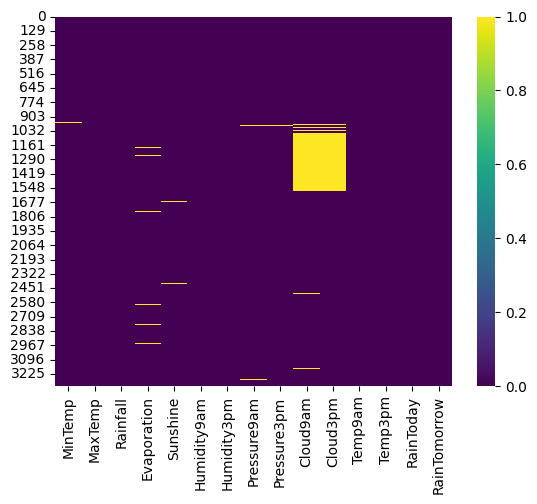

In [ ]:
#Creating heatmap of missing values
sns.heatmap(df.isnull(), cmap = 'viridis')

### Here the yellow lines represent amount of missing values in dataset

In [ ]:
#Getting percentage of null values in dataset corresponding to their features
null_percentage = df.isnull().mean() * 100
null_percentage

,0
MinTemp,0.089901
MaxTemp,0.059934
Rainfall,0.179802
Evaporation,1.528319
Sunshine,0.479473
Humidity9am,0.419539
Humidity3pm,0.389571
Pressure9am,0.599341
Pressure3pm,0.569374
Cloud9am,16.961343


In [ ]:
#Specify the columns that contains less than 5% missing values
columns_with_missing = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','Humidity9am','Humidity3pm','Pressure9am',
                        'Pressure3pm','Temp9am','Temp3pm','RainToday']

#Removing rows with missing values in the sprecified columns
df2= df.dropna(subset = columns_with_missing)

In [ ]:
#Filling rest columns that missing values with their mean or mode whichever necessary
df2 = df2.fillna(df.mean())

<Axes: >

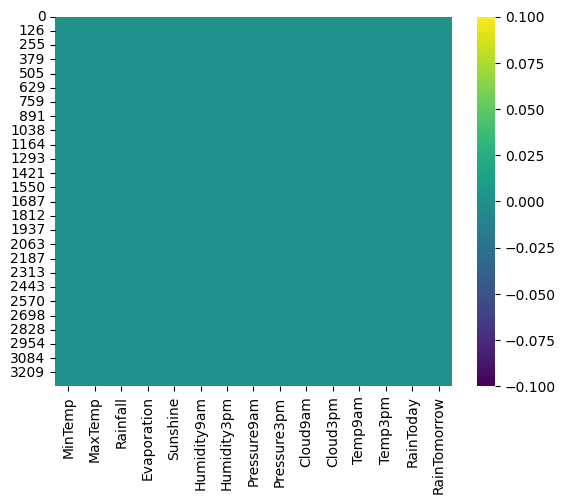

In [ ]:
#Again creating heatmap of missing values
sns.heatmap(df2.isnull(), cmap ='viridis')

### Now our dataset don't have any missing values

In [ ]:
print("Previous dataset contains", df.shape[0],"rows")
print("Dataset after removing missing values contains",df2.shape[0],"rows")

Previous dataset contains 3337 rows
Dataset after removing missing values contains 3220 rows


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3220 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3220 non-null   float64
 1   MaxTemp       3220 non-null   float64
 2   Rainfall      3220 non-null   float64
 3   Evaporation   3220 non-null   float64
 4   Sunshine      3220 non-null   float64
 5   Humidity9am   3220 non-null   float64
 6   Humidity3pm   3220 non-null   float64
 7   Pressure9am   3220 non-null   float64
 8   Pressure3pm   3220 non-null   float64
 9   Cloud9am      3220 non-null   float64
 10  Cloud3pm      3220 non-null   float64
 11  Temp9am       3220 non-null   float64
 12  Temp3pm       3220 non-null   float64
 13  RainToday     3220 non-null   float64
 14  RainTomorrow  3220 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 402.5 KB


In [ ]:
#Checking for duplicate rows
df2.duplicated().sum()

0

#Data Visualization

<Axes: xlabel='RainTomorrow', ylabel='count'>

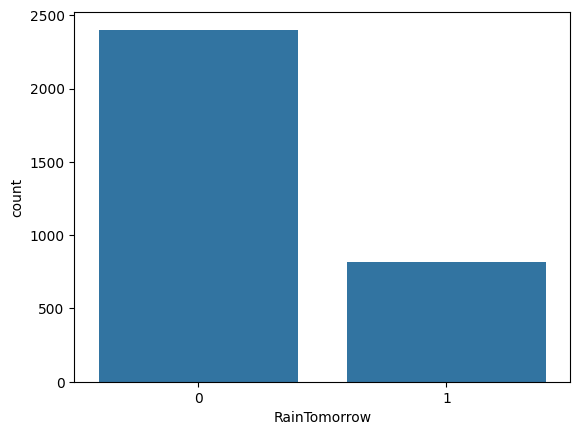

In [ ]:
sns.countplot(x = 'RainTomorrow', data = df2)


##Heatmap of a Correalation matrix

<Axes: >

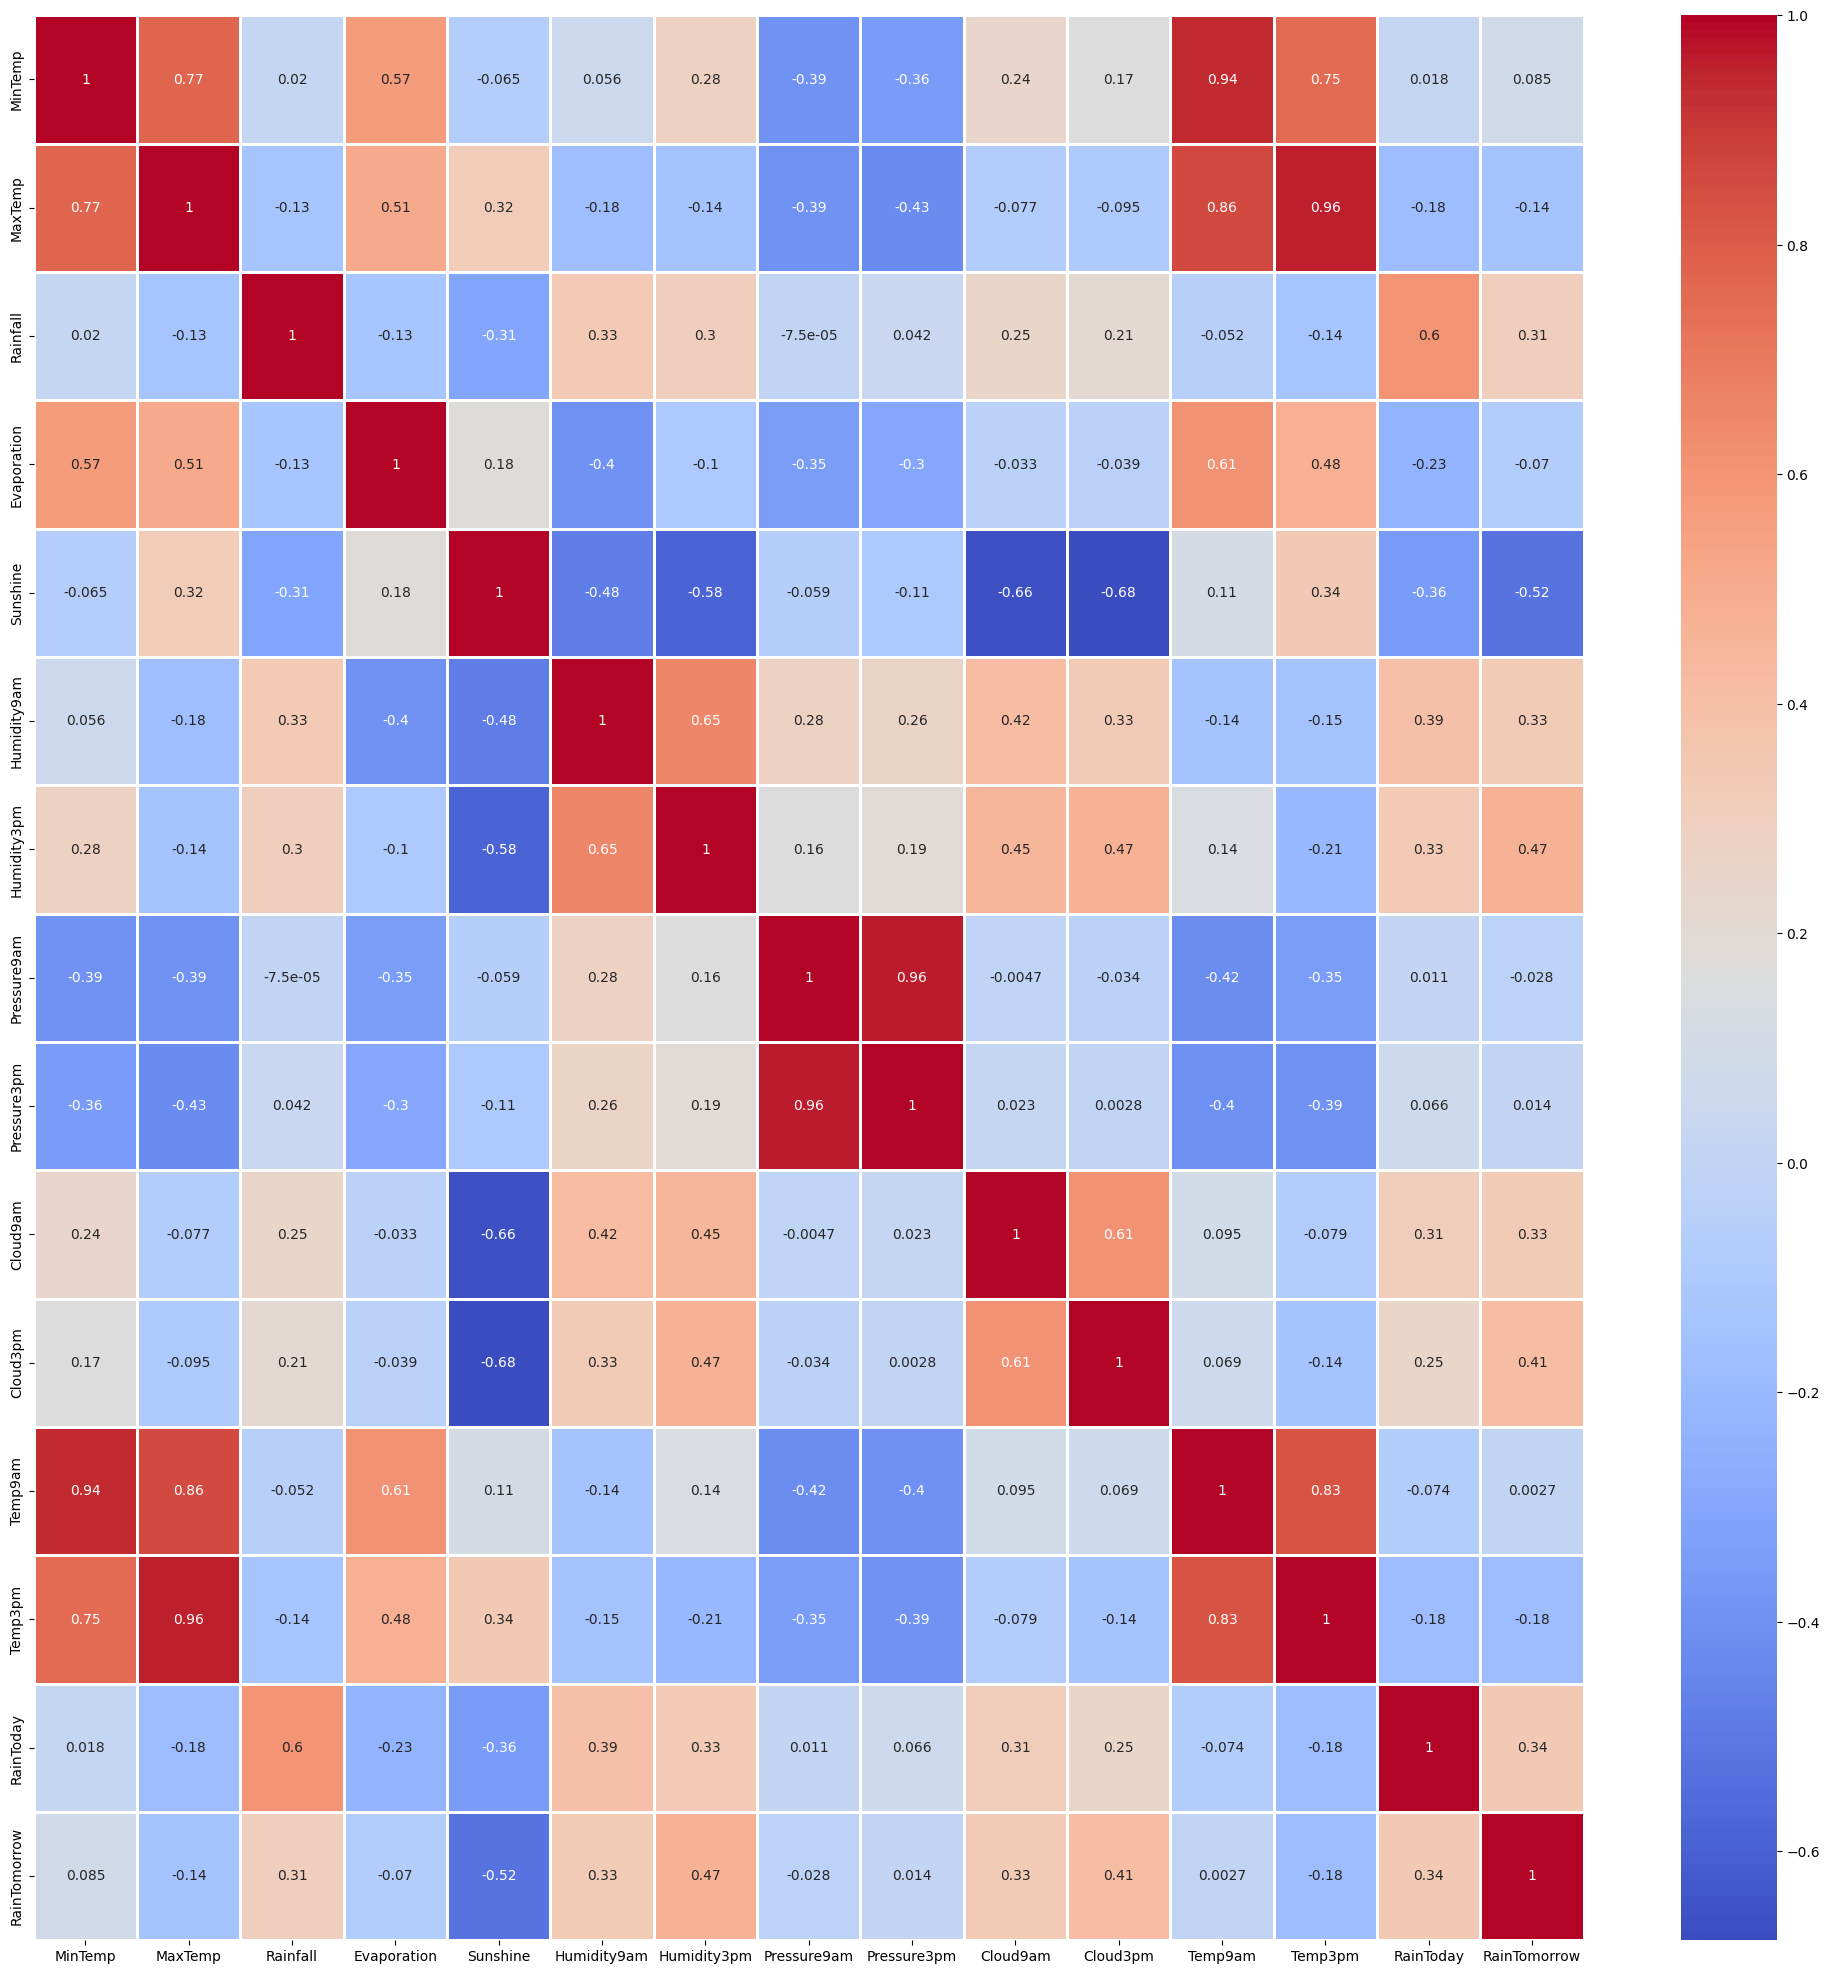

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df2.corr(), annot = True, cmap = 'coolwarm', linewidths = 2)

##Creating heatmap after removing multicollinearity

<Axes: >

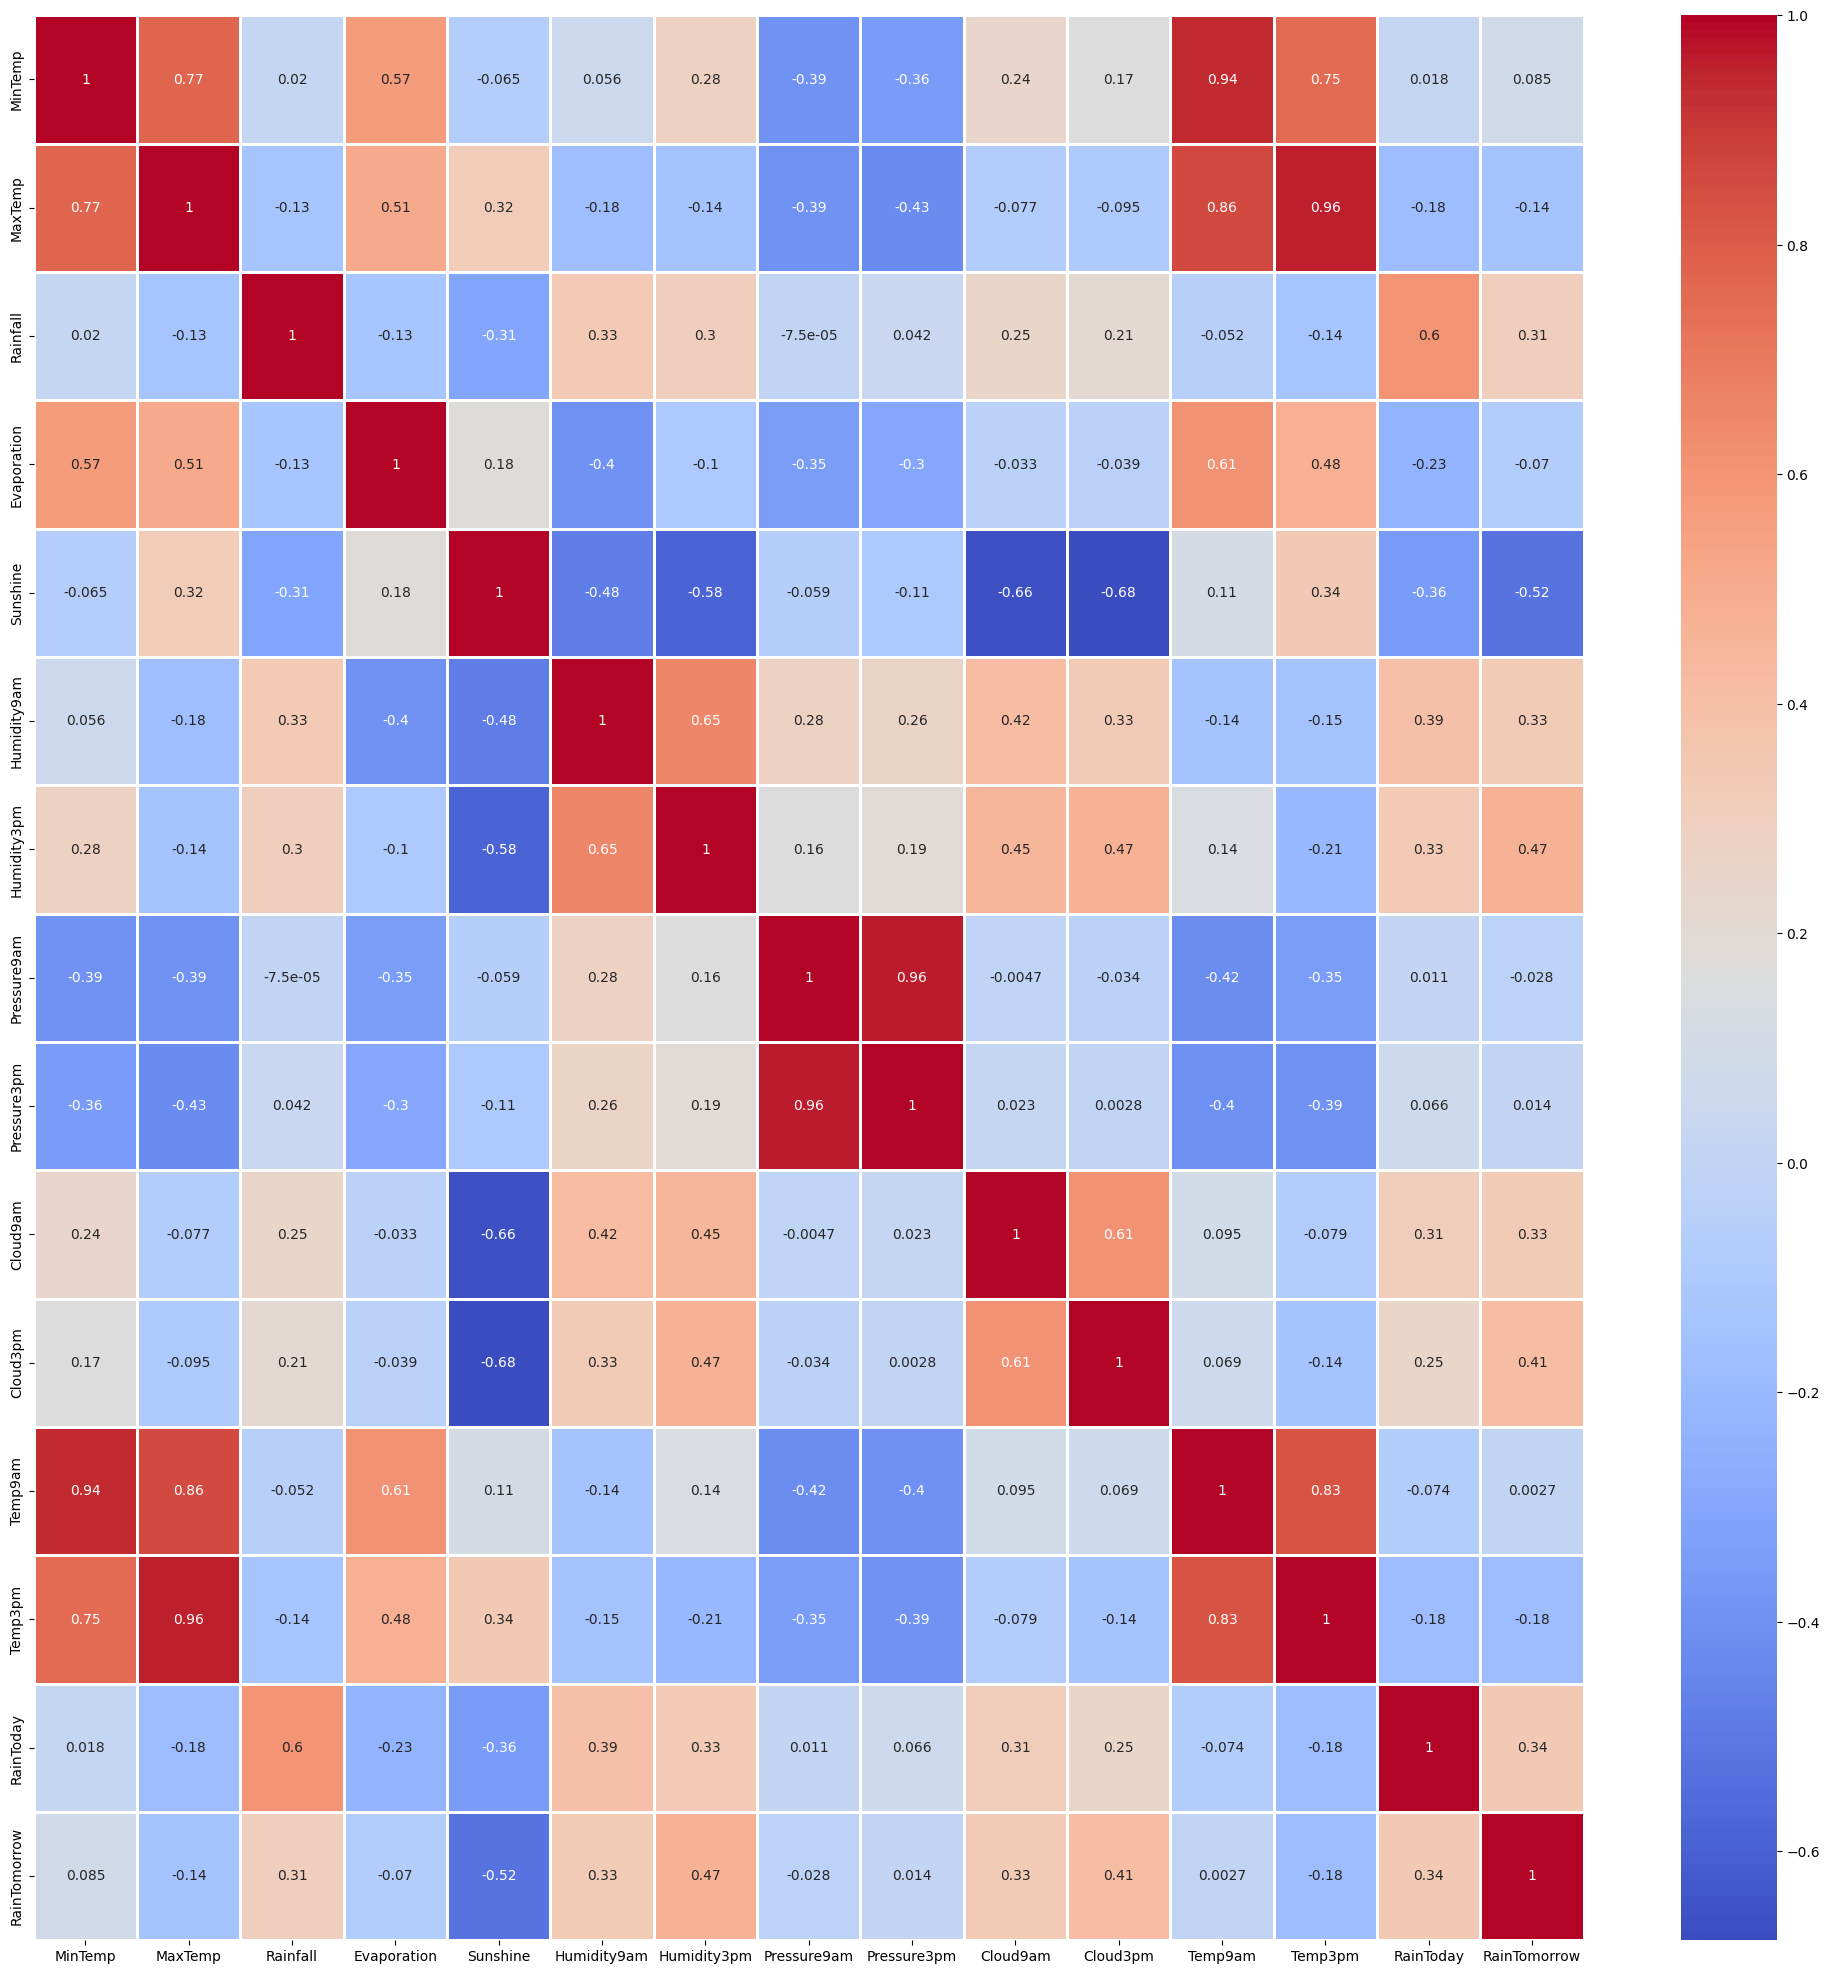

In [ ]:
plt.figure(figsize = (25,25))
sns.heatmap(df2.corr(),annot = True, cmap ='coolwarm',linewidth = 2)

In [ ]:
# function to create histogram, and boxplot

def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

******* MinTemp *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


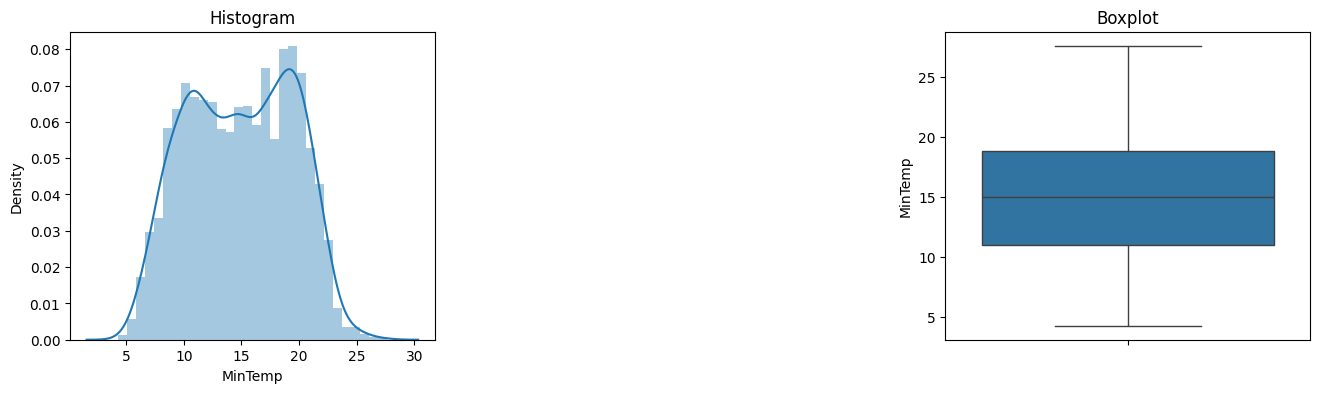

******* MaxTemp *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


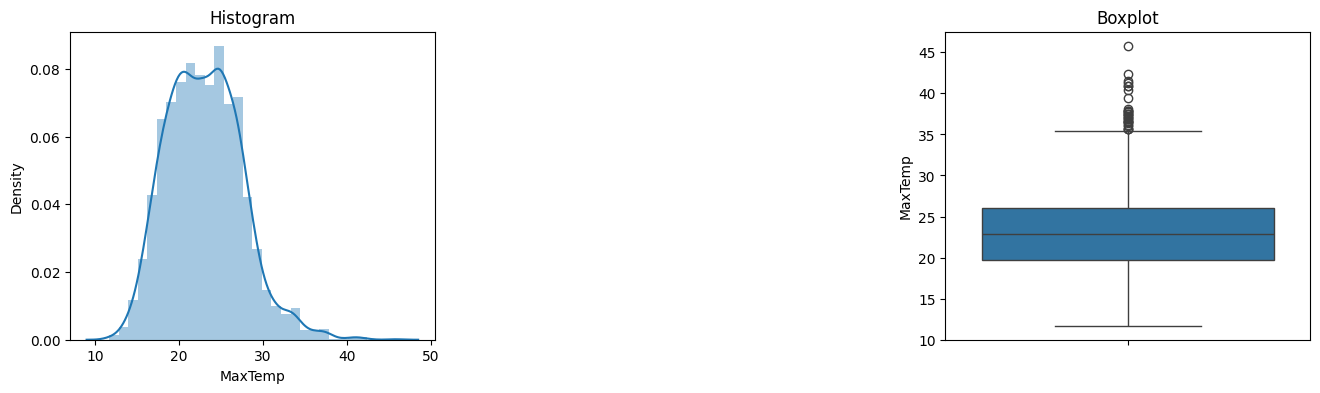

******* Rainfall *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


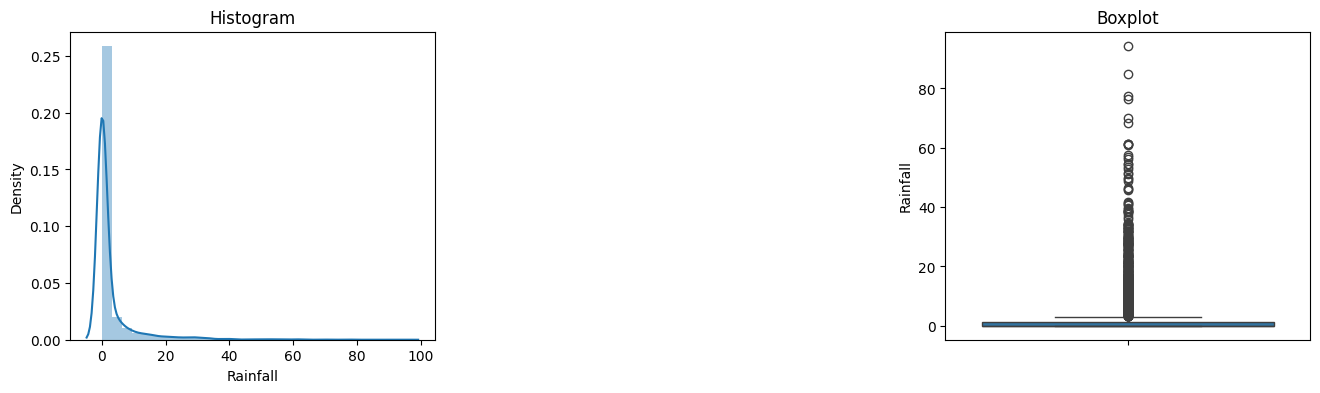

******* Evaporation *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


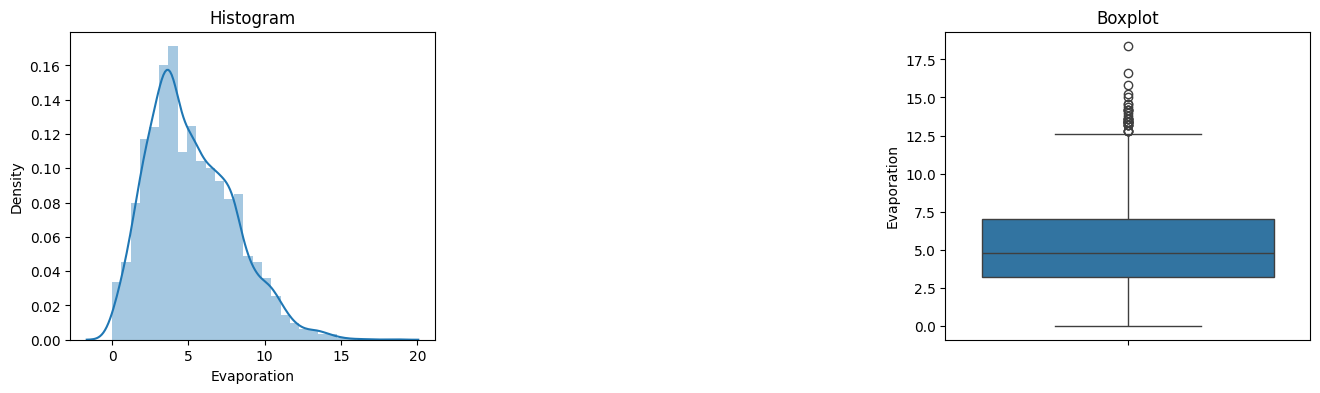

******* Sunshine *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


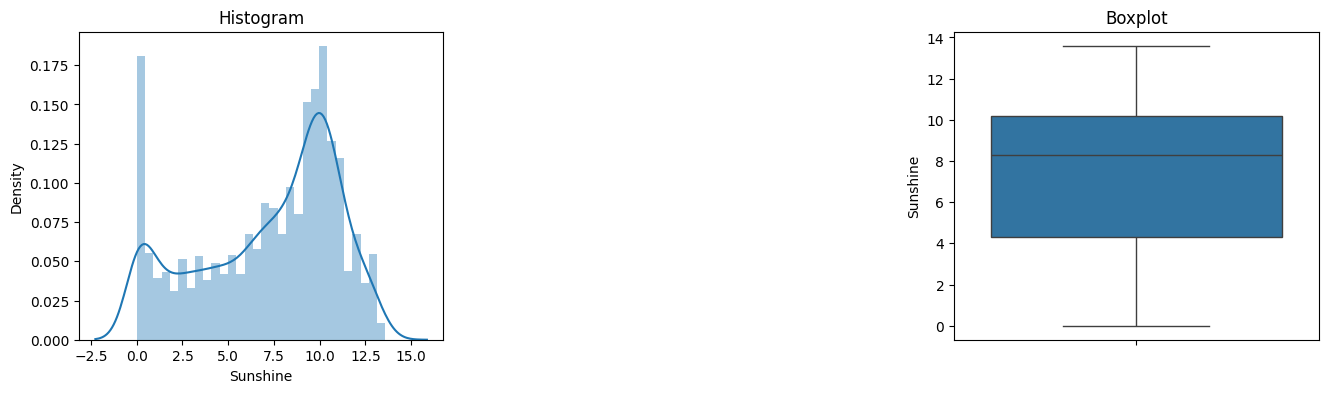

******* Humidity9am *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


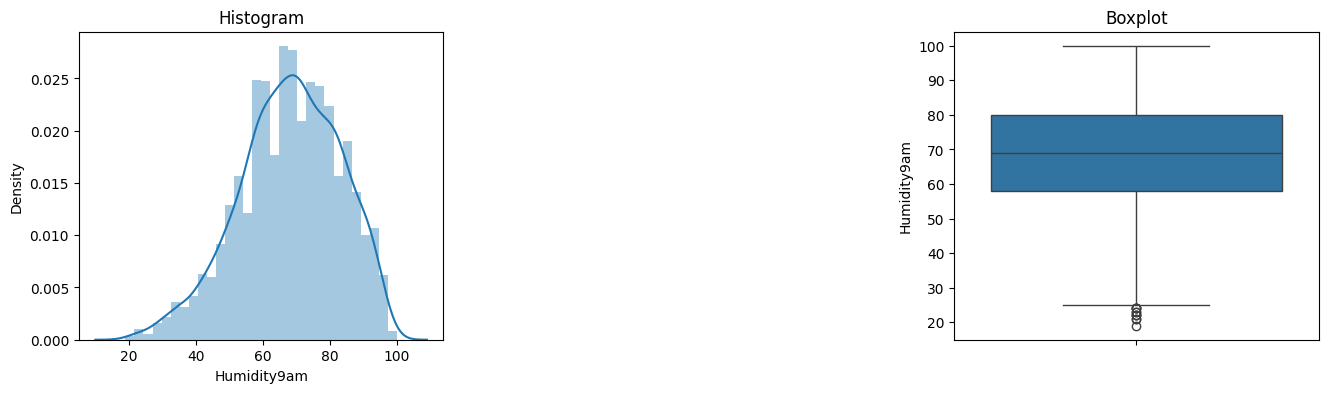

******* Humidity3pm *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


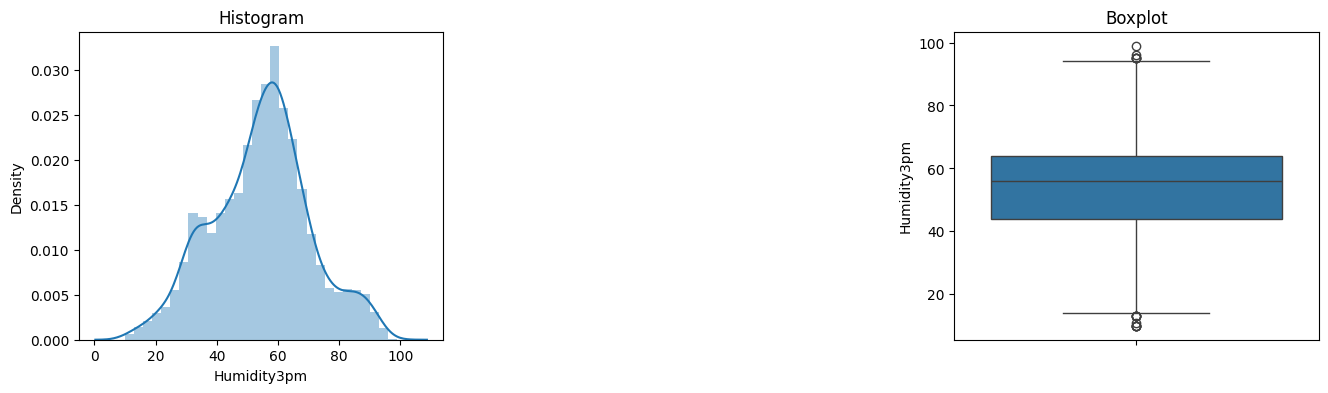

******* Pressure9am *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


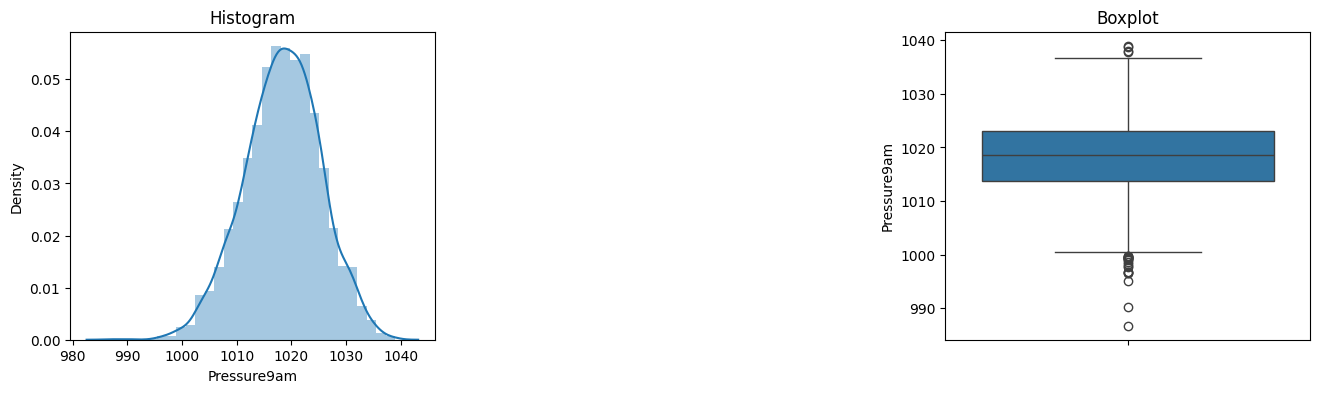

******* Pressure3pm *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


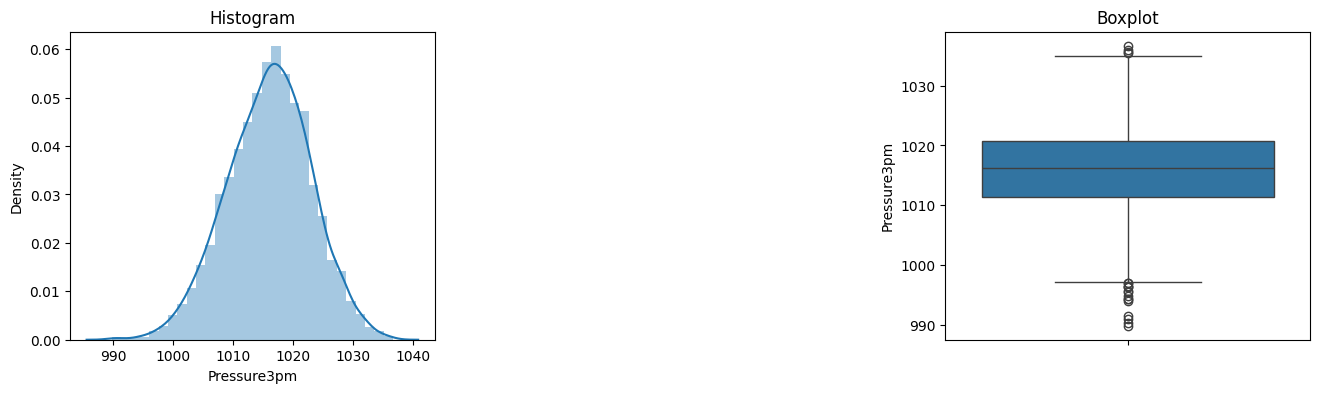

******* Cloud9am *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


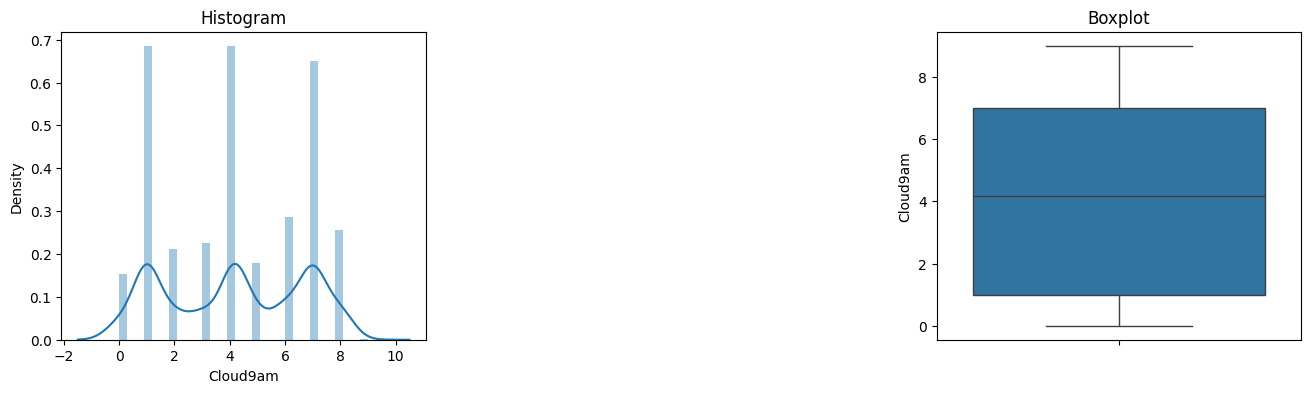

******* Cloud3pm *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


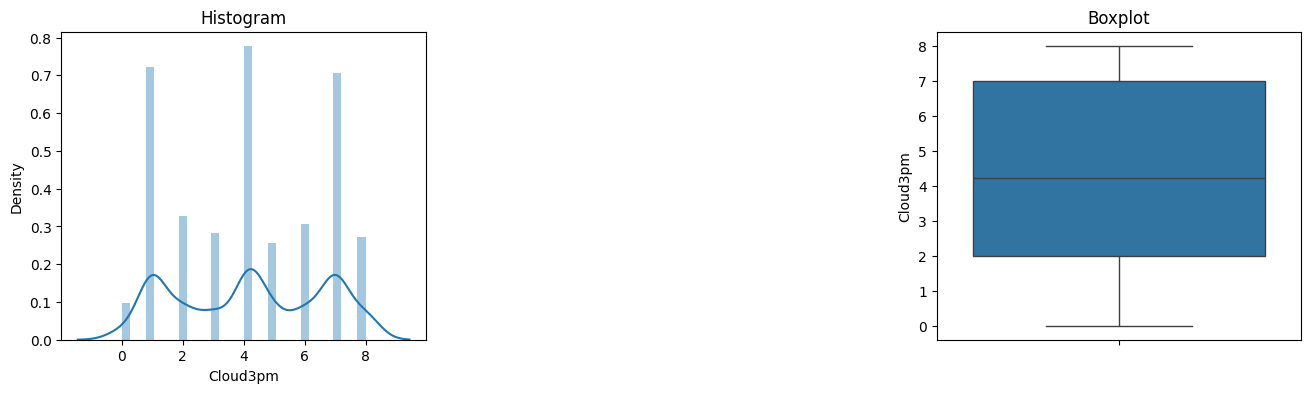

******* Temp9am *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


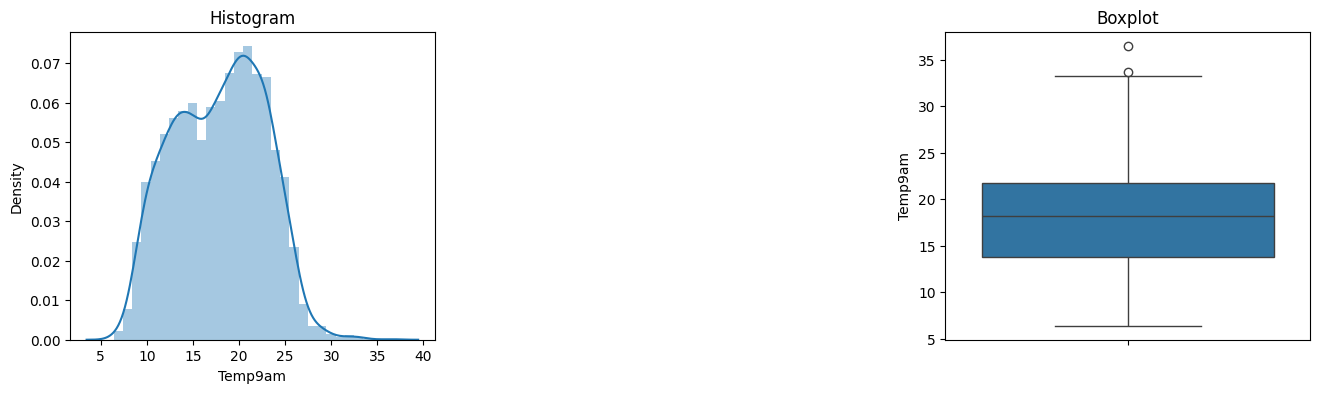

******* Temp3pm *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


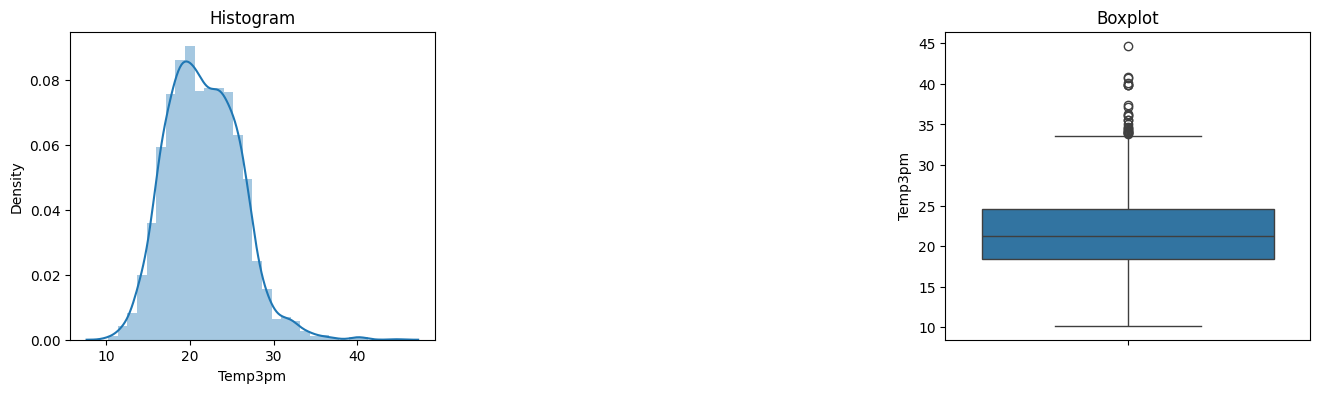

******* RainToday *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


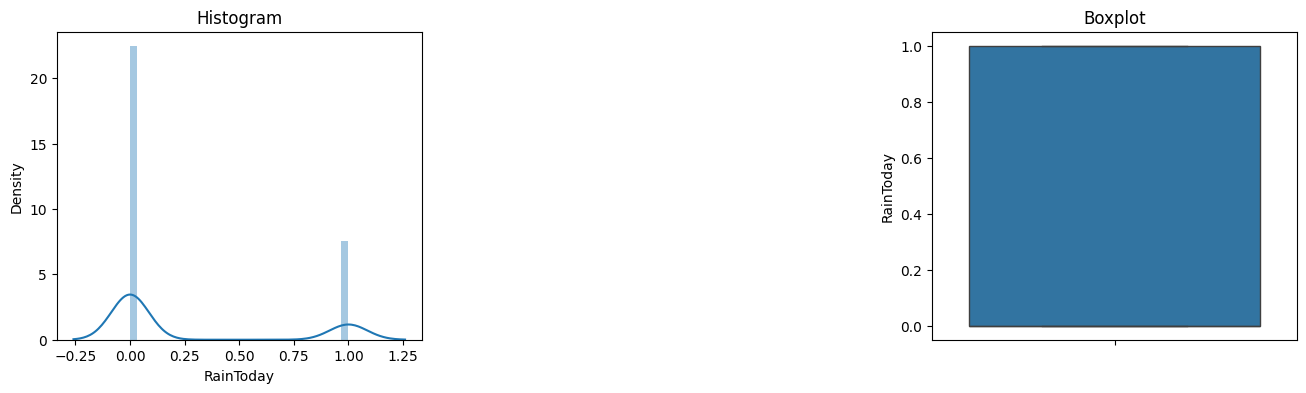

******* RainTomorrow *******


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


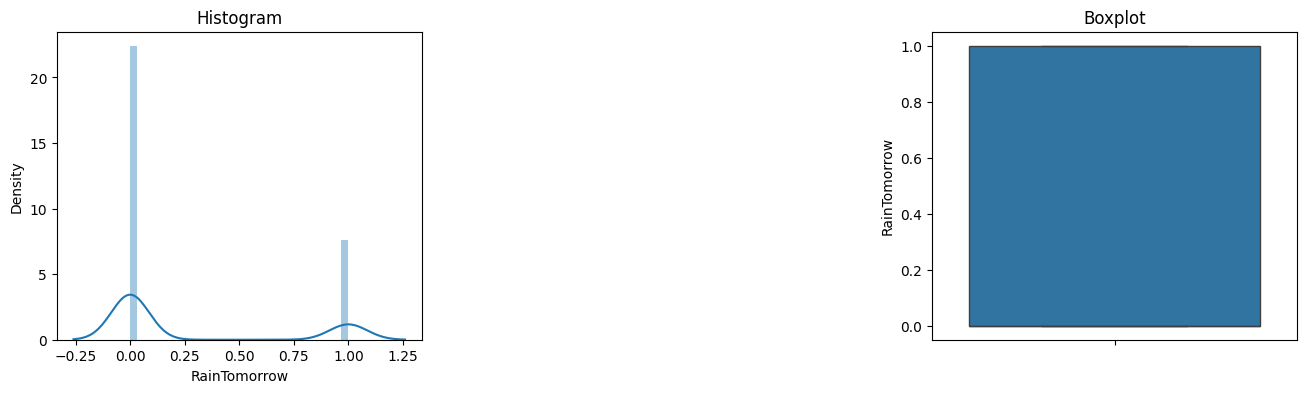

In [ ]:
# Calling diagnostic_plots function before removing outliers
for item in df2.columns:
    print("******* {} *******".format(item))
    diagnostic_plots(df2, item)

# Check for Outliers

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


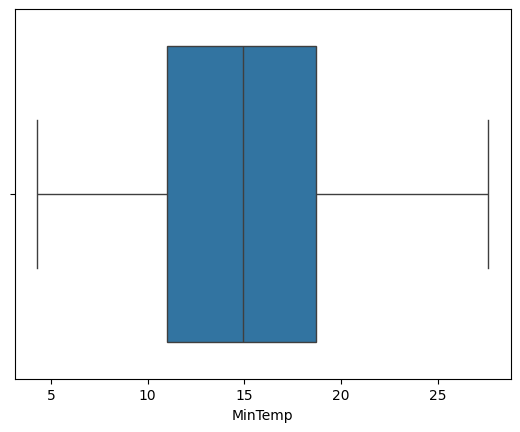

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


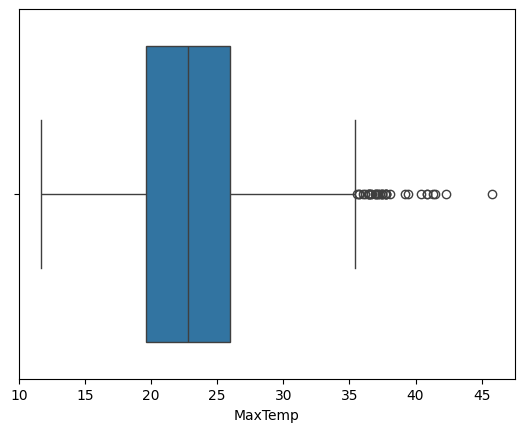

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


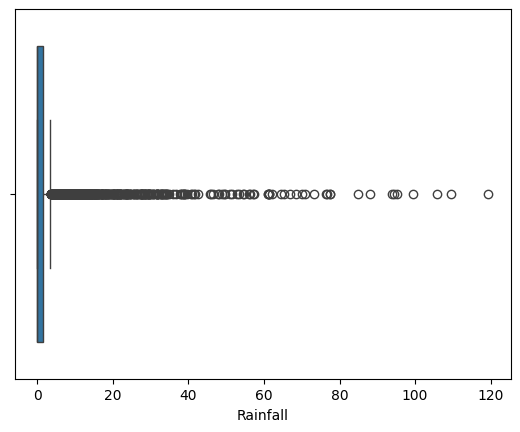

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


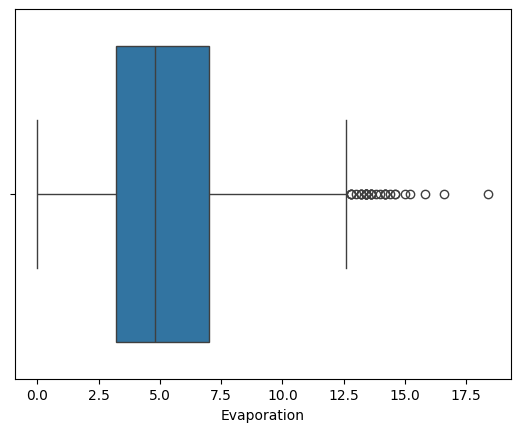

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


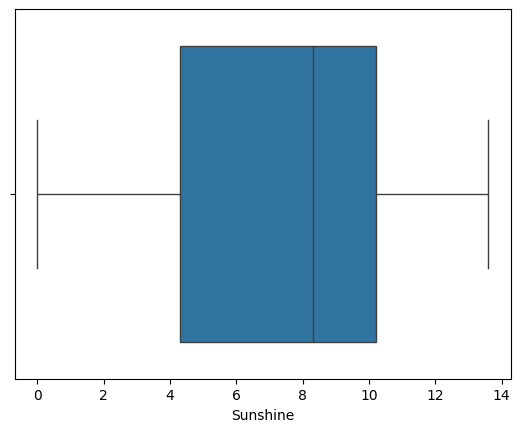

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


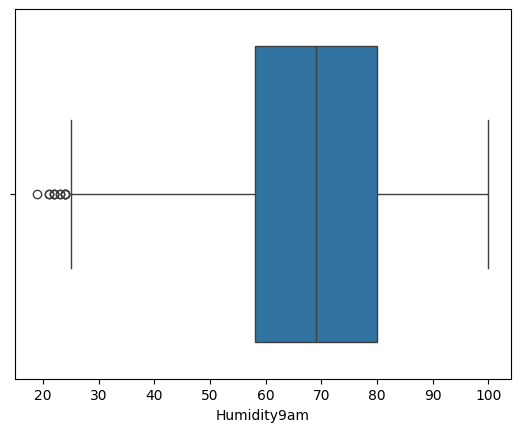

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


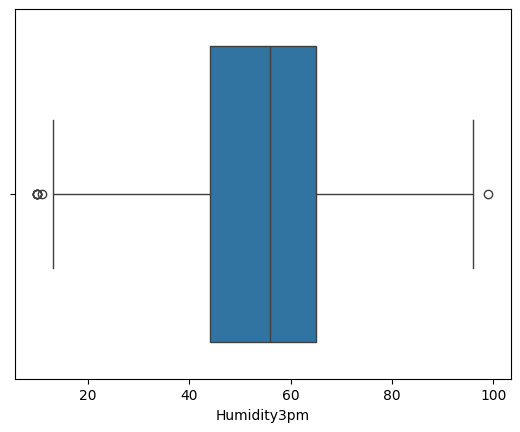

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


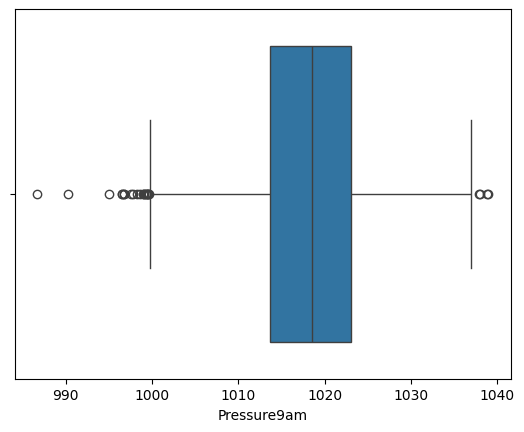

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


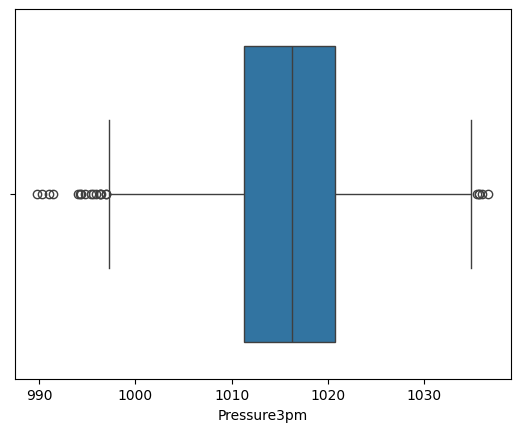

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


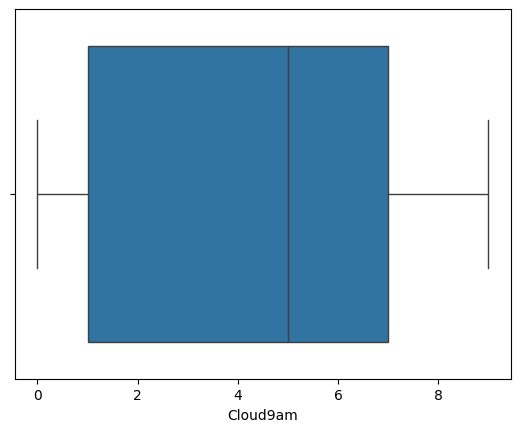

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


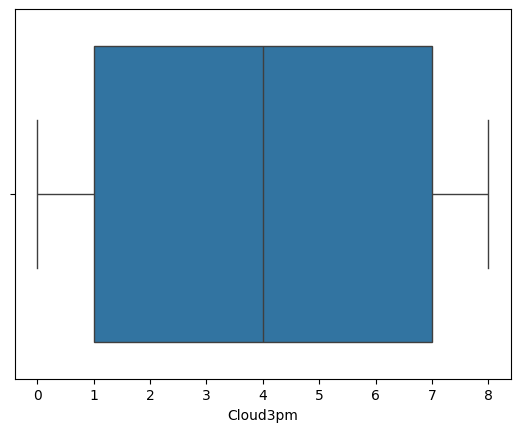

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


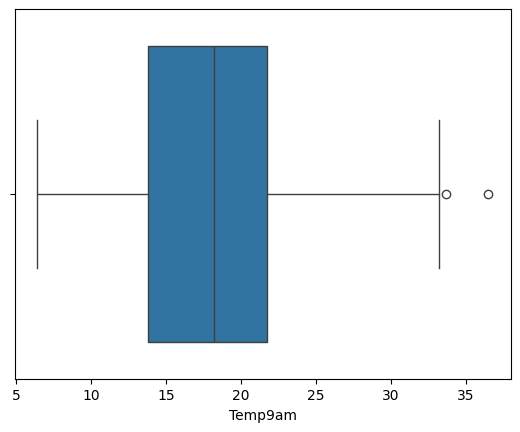

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


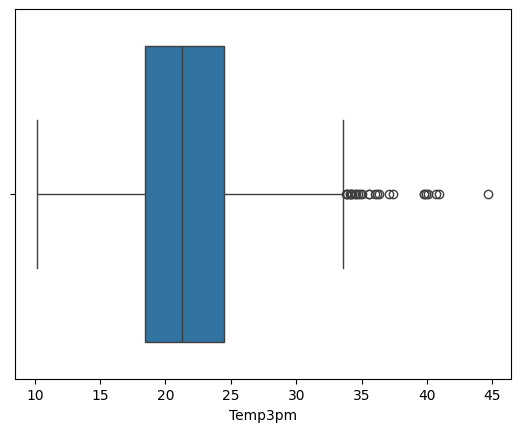

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


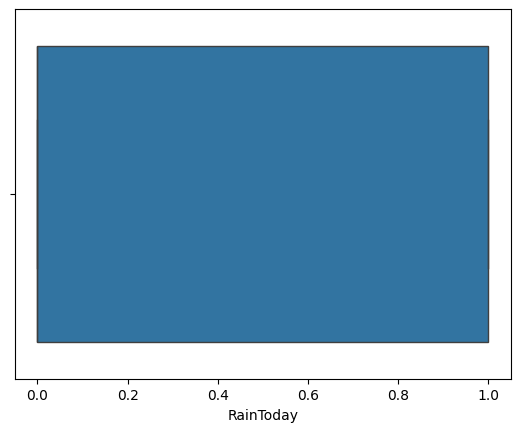

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


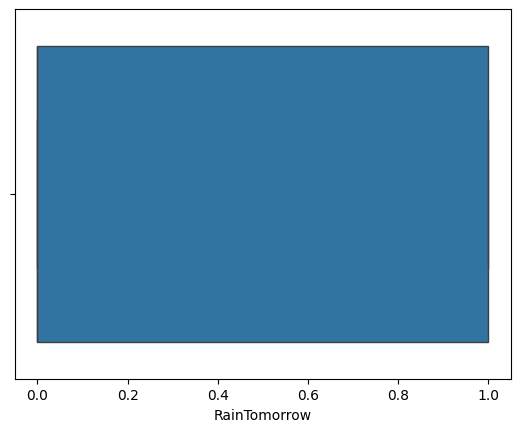

In [ ]:
#check for outliers using seaborn

import matplotlib.pyplot as plt

# Create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()


##Handling Outliers

In [ ]:
#function to handle outliers using Interquartile range
def handle_outliers_iqr(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    iqr = q3 -q1
    lower_threshold = q1 - (1.5 * iqr)
    upper_threshold = q3 + (1.5 * iqr)

    df2.loc[df[feature] <= lower_threshold, feature] = lower_threshold
    df2.loc[df[feature] >= upper_threshold, feature] = upper_threshold

    return df2

In [ ]:
# Callling handle_outliers_iqr function for removing outliers
for feature in df2.columns:
    df2 = handle_outliers_iqr(df2, feature)

<ipython-input-58-4b85f16268d8>:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df[feature] <= lower_threshold, feature] = lower_threshold


***** MinTemp *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


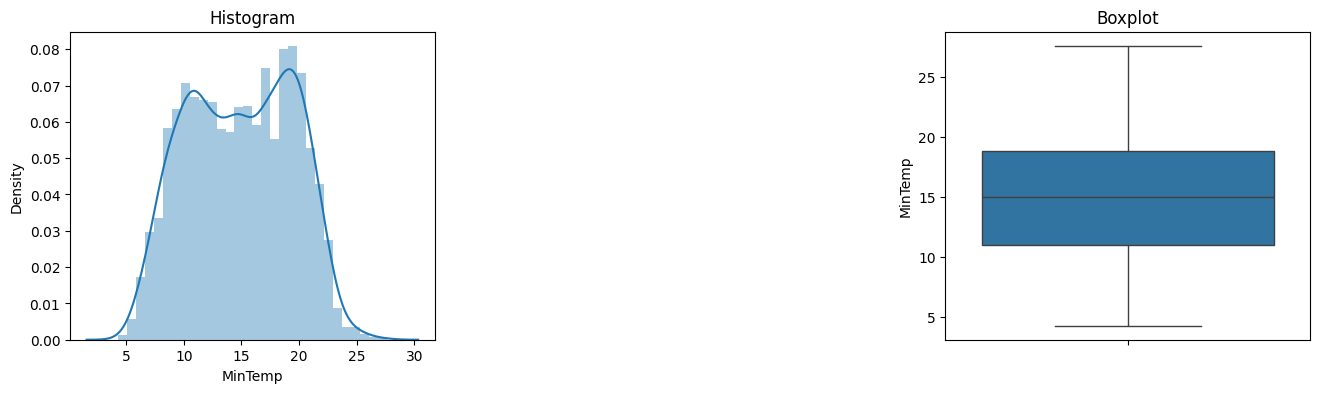

***** MaxTemp *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


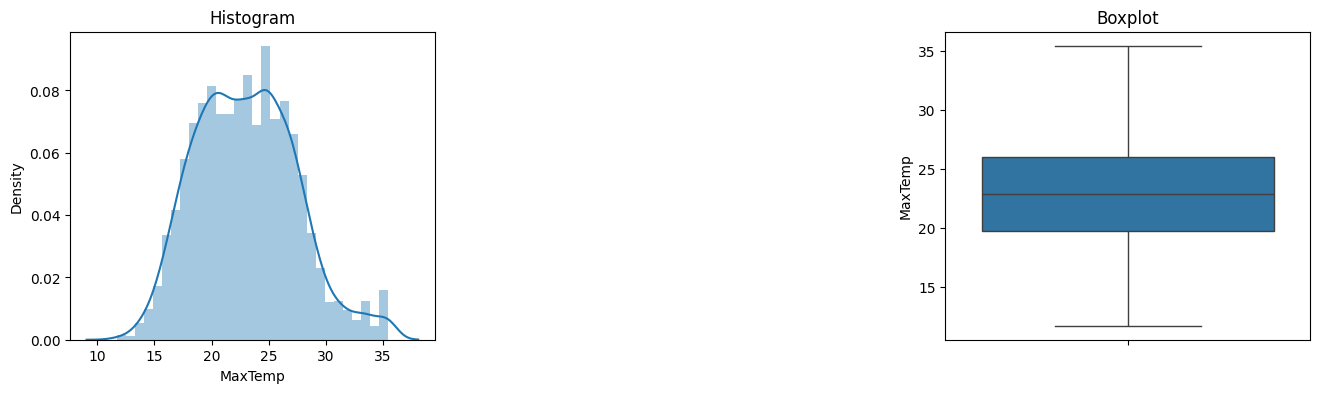

***** Rainfall *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


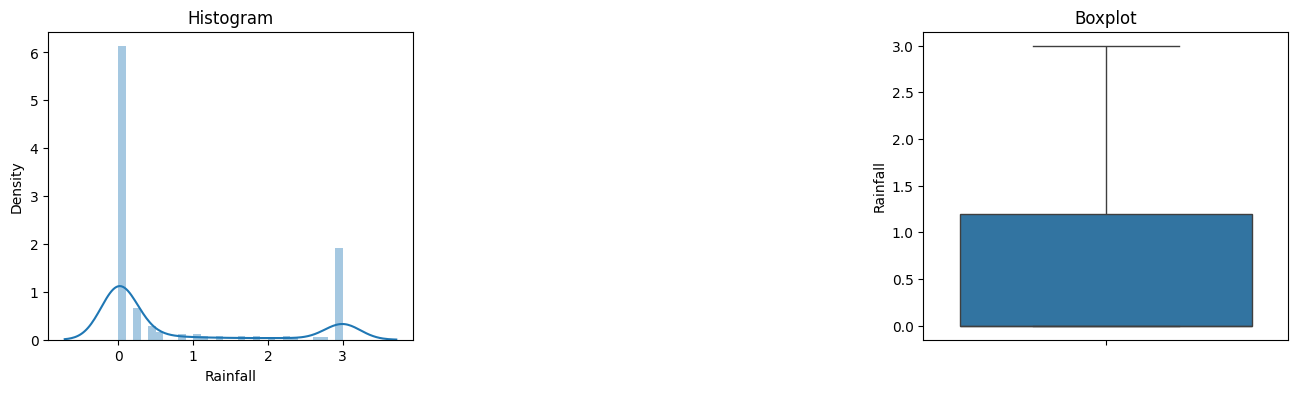

***** Evaporation *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


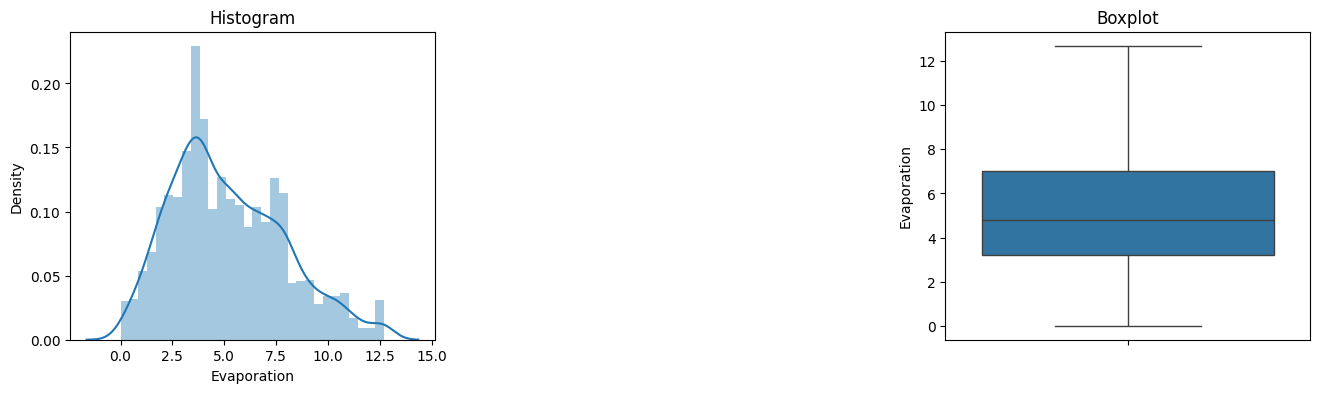

***** Sunshine *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


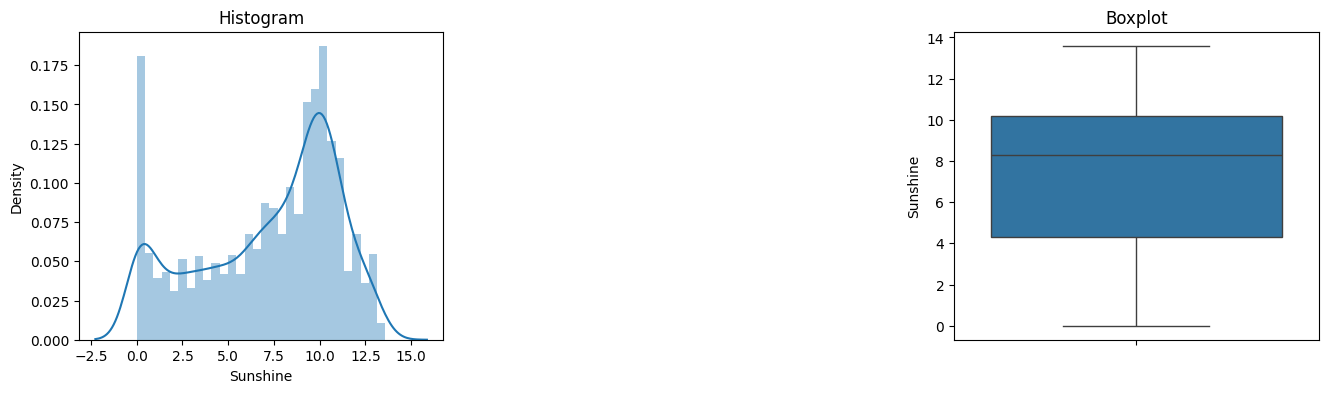

***** Humidity9am *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


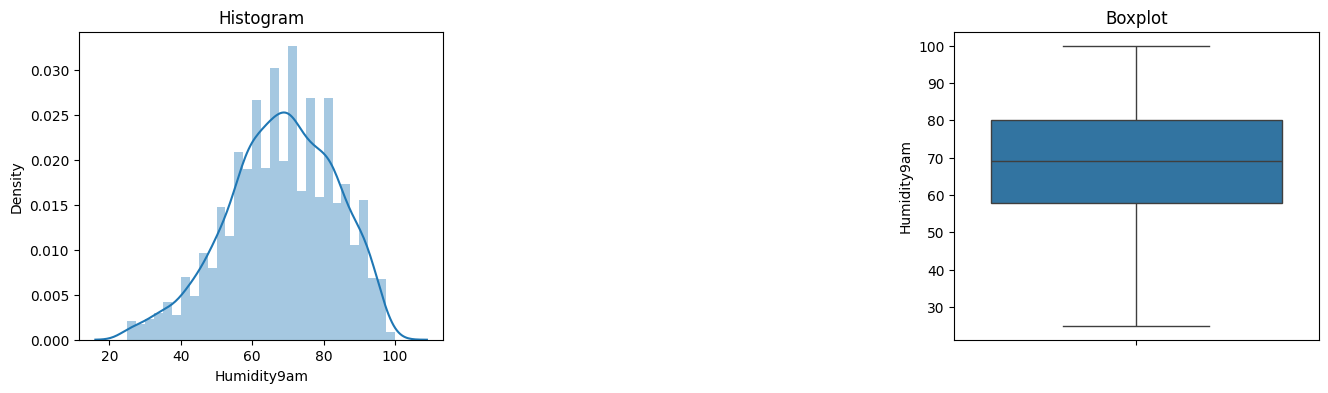

***** Humidity3pm *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


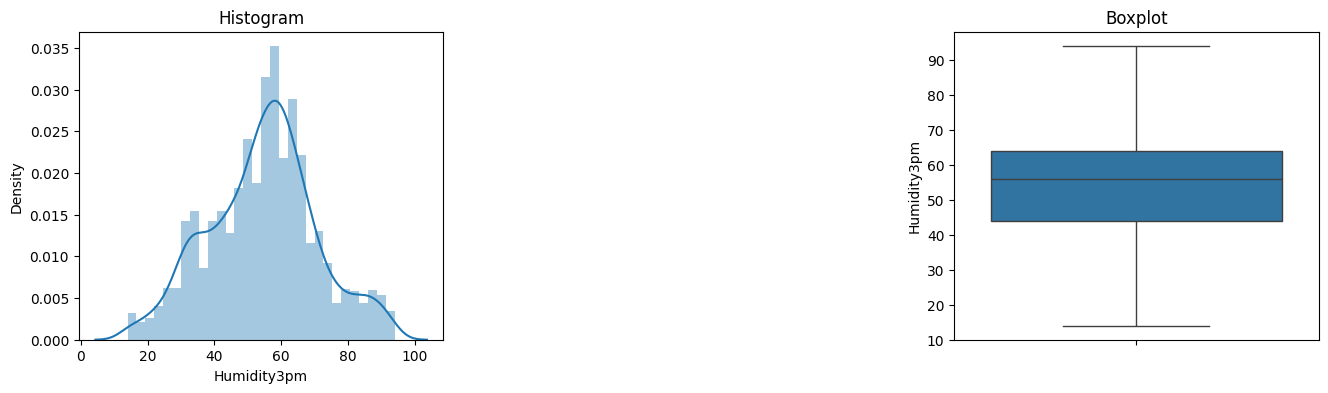

***** Pressure9am *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


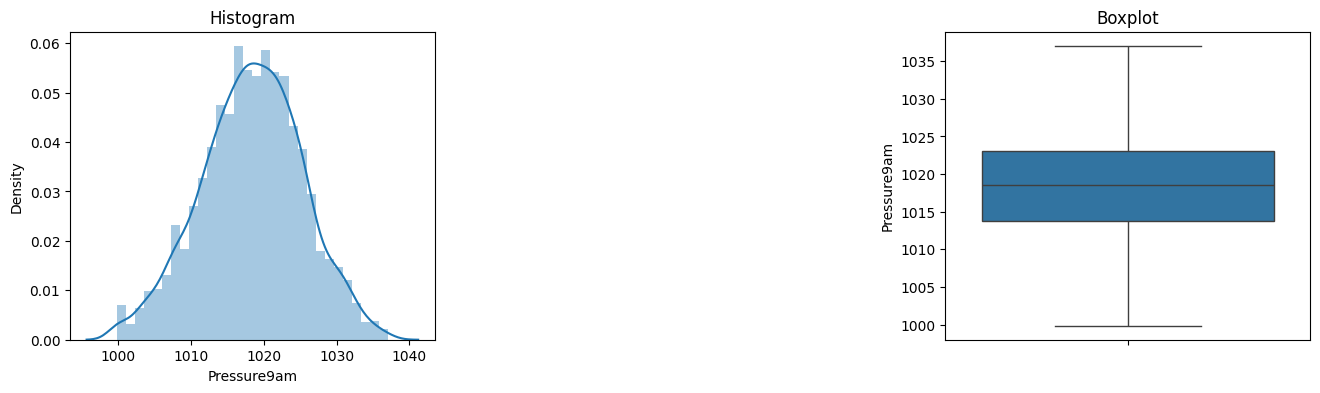

***** Pressure3pm *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


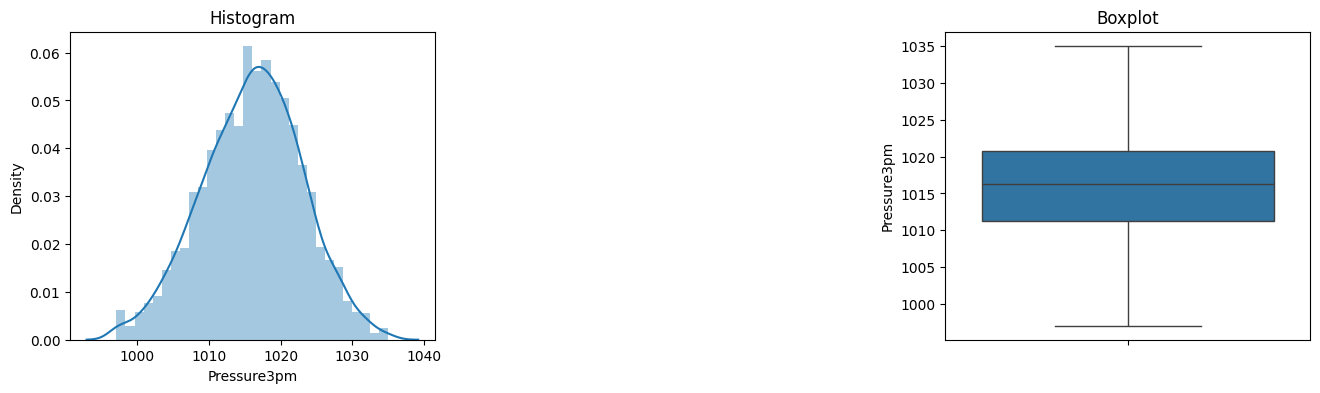

***** Cloud9am *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


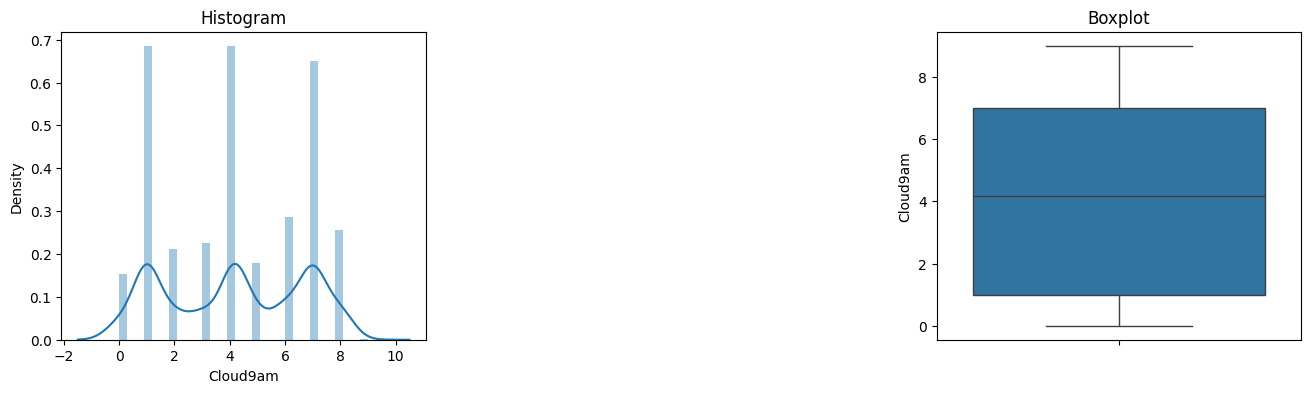

***** Cloud3pm *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


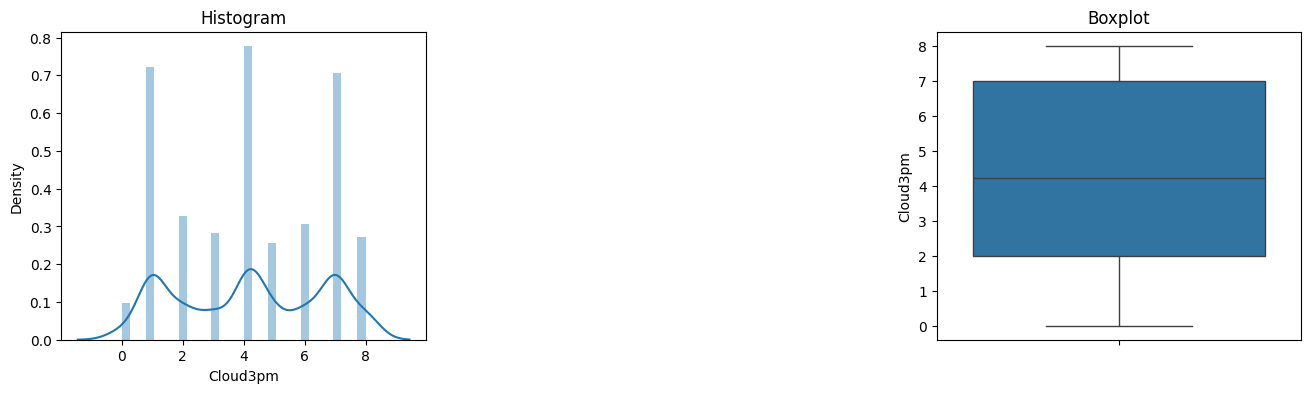

***** Temp9am *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


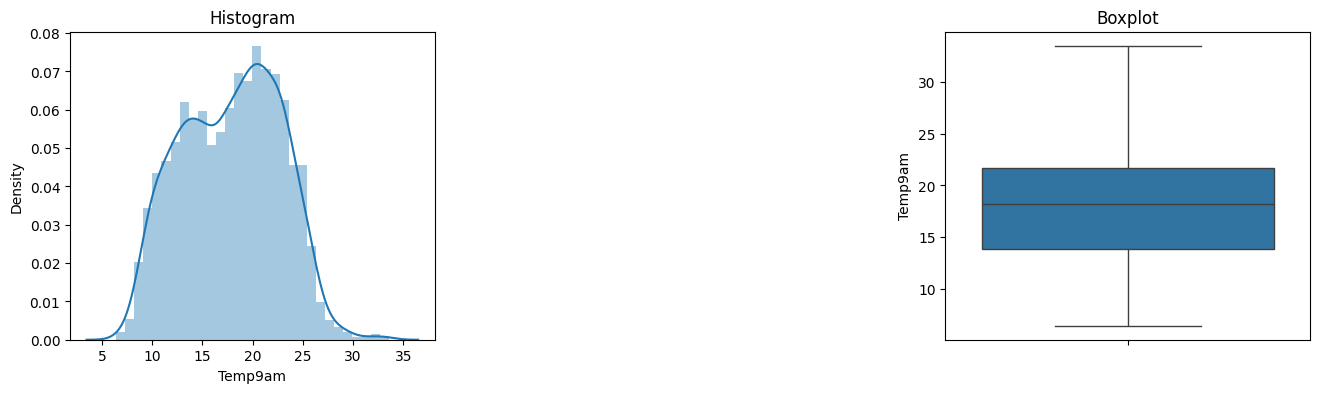

***** Temp3pm *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


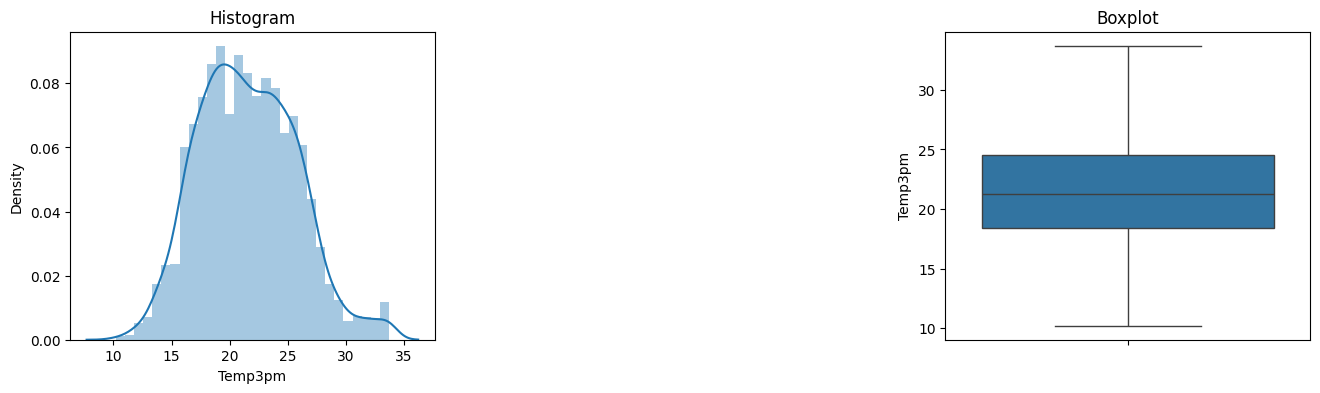

***** RainToday *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


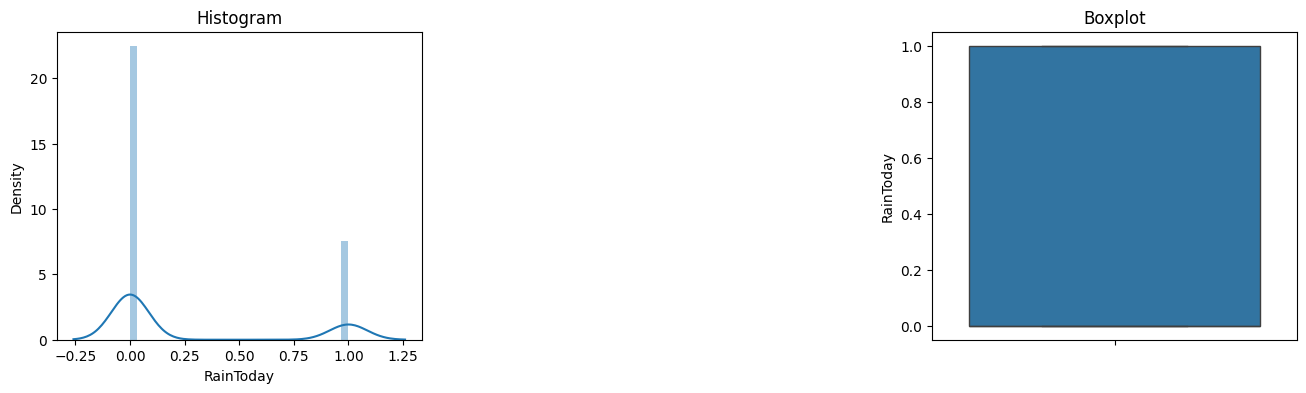

***** RainTomorrow *****


<ipython-input-53-c88e21af7978>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


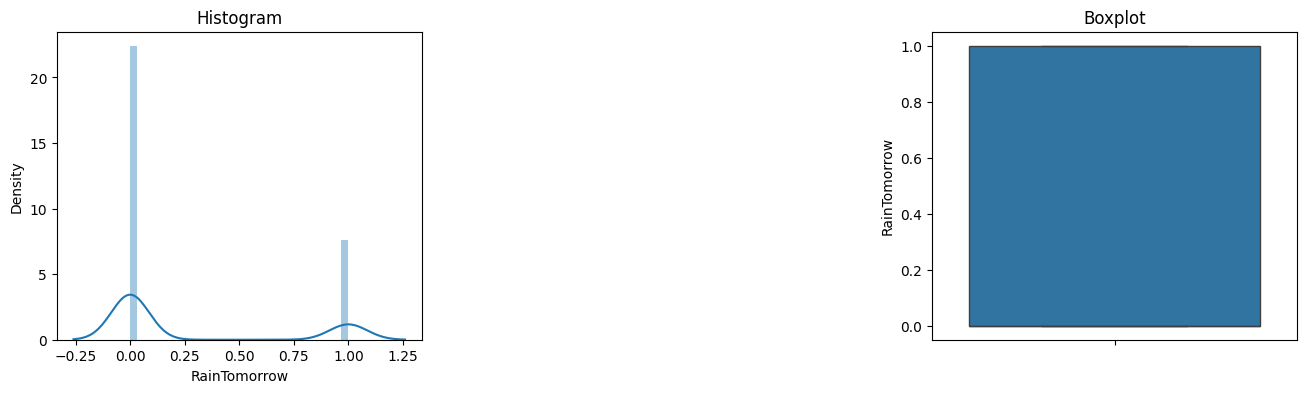

In [ ]:
# Calling diagnostic_plots function after handling outliers
for item in df2.columns:
    print("***** {} *****".format(item))
    diagnostic_plots(df2, item)

## Performing EDD on our dataset(After Preprocessing)

In [ ]:
# describe the whole data
df2.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,14.889783,23.014332,0.746646,5.168323,7.216398,68.062733,54.487578,1018.376149,1016.036859,4.155145,4.192367,17.842298,21.554352,0.252174,0.254348
std,4.564271,4.401503,1.198663,2.736820,3.796151,15.000418,16.161911,6.955953,6.972531,2.505873,2.407694,4.902826,4.216069,0.434328,0.435562
min,4.300000,11.700000,0.000000,0.000000,0.000000,25.000000,14.000000,999.850000,997.050000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.700000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,1.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,15.000000,22.900000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.800000,26.000000,1.200000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.525000,1.000000,1.000000
max,27.600000,35.450000,3.000000,12.700000,13.600000,100.000000,94.000000,1037.050000,1035.050000,9.000000,8.000000,33.550000,33.712500,1.000000,1.000000


In [ ]:
# Corelation between variables
corr = df2.corr()
corr

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.777090,0.021391,0.575502,-0.064941,0.056111,0.278304,-0.397547,-0.357436,0.242059,0.165443,0.939617,0.759953,0.017754,0.085143
MaxTemp,0.777090,1.000000,-0.185783,0.516597,0.325467,-0.175490,-0.134407,-0.395534,-0.427883,-0.078420,-0.097618,0.862737,0.960576,-0.181180,-0.146703
Rainfall,0.021391,-0.185783,1.000000,-0.248303,-0.370067,0.416320,0.348030,0.007626,0.066528,0.320777,0.257837,-0.074877,-0.187058,0.965552,0.356118
Evaporation,0.575502,0.516597,-0.248303,1.000000,0.179292,-0.398925,-0.101231,-0.347217,-0.303233,-0.033223,-0.040071,0.613006,0.483139,-0.235963,-0.069101
Sunshine,-0.064941,0.325467,-0.370067,0.179292,1.000000,-0.483817,-0.580286,-0.059399,-0.106975,-0.659790,-0.677536,0.113159,0.344041,-0.356184,-0.522939
Humidity9am,0.056111,-0.175490,0.416320,-0.398925,-0.483817,1.000000,0.653219,0.277724,0.264142,0.419030,0.328142,-0.143763,-0.146004,0.394288,0.328534
Humidity3pm,0.278304,-0.134407,0.348030,-0.101231,-0.580286,0.653219,1.000000,0.162086,0.190818,0.450773,0.471007,0.137106,-0.196381,0.332983,0.470635
Pressure9am,-0.397547,-0.395534,0.007626,-0.347217,-0.059399,0.277724,0.162086,1.000000,0.963865,-0.003955,-0.033786,-0.424470,-0.351153,0.012104,-0.027281
Pressure3pm,-0.357436,-0.427883,0.066528,-0.303233,-0.106975,0.264142,0.190818,0.963865,1.000000,0.023740,0.003112,-0.406530,-0.393904,0.067342,0.014552
Cloud9am,0.242059,-0.078420,0.320777,-0.033223,-0.659790,0.419030,0.450773,-0.003955,0.023740,1.000000,0.608809,0.095349,-0.080492,0.307533,0.330753


## Split Dataframe in train and test

In [ ]:
X = df2.drop(["RainTomorrow"], axis = 1)
y = df2["RainTomorrow"]

In [ ]:
# Split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 51 )

print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (2576, 14)
Shape of y_train =  (2576,)
Shape of X_test =  (644, 14)
Shape of y_test =  (644,)


# Feature Scaling
###Converting differnet units and magnitude data in one unit

In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Rainfall Prediction Machine Learning Model Building

Now we have clean data to build the ML model. But which machine learning algorithm is best for the data we have to find. The output is classification fromat so we will use supervised classification machine learning algorithms.

To build the best model, we have to train and test the dataset with multiple Machine Learning algorithm then we can find the best ML model. So lets try.

In [ ]:
# Importing libraries for finding accuracy_score, confusion_matrix, classification_report, roc_curve and roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score

## Defining a custom fuction to run different models

In [ ]:
def  evaluate_classifier(clf, x_train, x_test, y_train, y_test):
    #fit the classifier
    clf.fit(X_train, y_train)

    #Make predictions on the test set
    y_pred = clf.predict(X_test)
    y_train_pred = clf.predict(X_train)
    #calculate metrics
    accuracy_test  = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    cm= confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print("Accuracy_train", accuracy_train)
    print("Accuracy_test", accuracy_test)

    #Create a heatmap of the confusion matrix
    plt.figure(figsize=(2,1))
    sns.heatmap(cm, annot=True, cmap = "Blues", fmt = "d", cbar = False)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    #Calculate the predicted probabilities of the positive class
    y_pred_proba = clf.predict_proba(X_test)[:, 1]

    #Compute the false positive rate,and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

    #compute the Area Under the curve(AUC)
    auc = roc_auc_score(y_test, y_pred_proba)

    #plot the ROC curve
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')

    #Print classification report, and AUC score
    print("\nClassification Report:")
    print(report)
    print("AUC Score: ", auc)

    return accuracy_train, accuracy_test, auc

# Logistic Regression

Accuracy_train 0.8373447204968945
Accuracy_test 0.8322981366459627


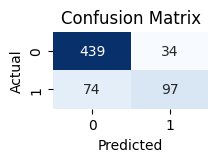


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89       473
         1.0       0.74      0.57      0.64       171

    accuracy                           0.83       644
   macro avg       0.80      0.75      0.77       644
weighted avg       0.83      0.83      0.82       644

AUC Score:  0.8432056179914197


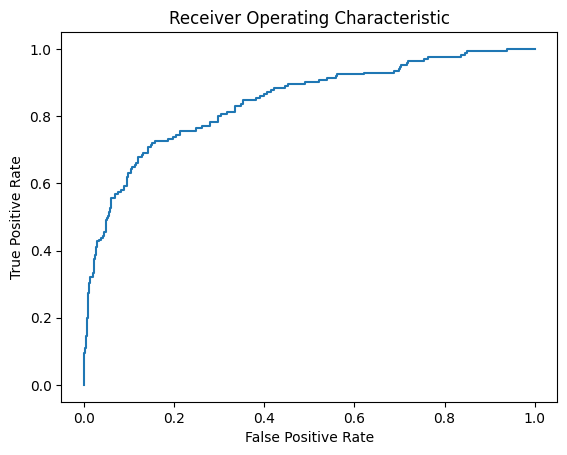

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg_accu_train , logreg_accu_test, logreg_auc = evaluate_classifier(logreg, X_train, X_test, y_train, y_test)

# Support Vector Classifier

Accuracy_train 0.8540372670807453
Accuracy_test 0.8245341614906833


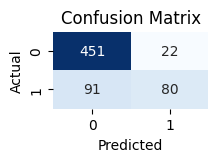


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       473
         1.0       0.78      0.47      0.59       171

    accuracy                           0.82       644
   macro avg       0.81      0.71      0.74       644
weighted avg       0.82      0.82      0.81       644

AUC Score:  0.8254268511306455


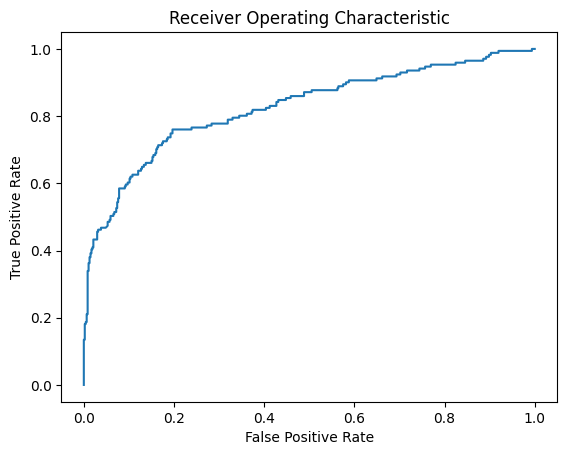

In [ ]:
from sklearn.svm import SVC
svc = SVC(probability = True)

svc_accu_train, svc_accu_test, svc_auc = evaluate_classifier(svc, X_train, X_test, y_train, y_test)

# Linear Discrimenant Analysis (LDA)

Accuracy_train 0.8361801242236024
Accuracy_test 0.8291925465838509


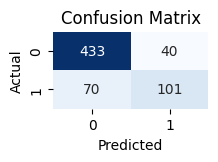


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       473
         1.0       0.72      0.59      0.65       171

    accuracy                           0.83       644
   macro avg       0.79      0.75      0.77       644
weighted avg       0.82      0.83      0.82       644

AUC Score:  0.8425379869688316


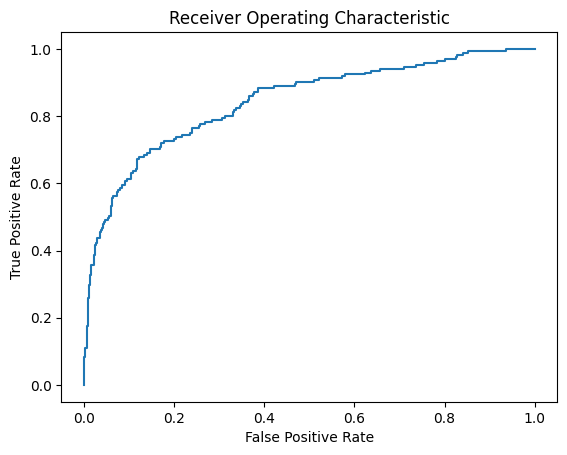

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

lda_accu_train, lda_accu_test, lda_auc = evaluate_classifier(lda, X_train, X_test, y_train, y_test)

# K-Nearest Neighbours (KNN)

Accuracy_train 0.8649068322981367
Accuracy_test 0.8105590062111802


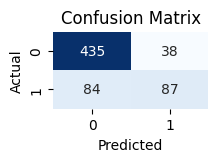


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.92      0.88       473
         1.0       0.70      0.51      0.59       171

    accuracy                           0.81       644
   macro avg       0.77      0.71      0.73       644
weighted avg       0.80      0.81      0.80       644

AUC Score:  0.7888864161813978


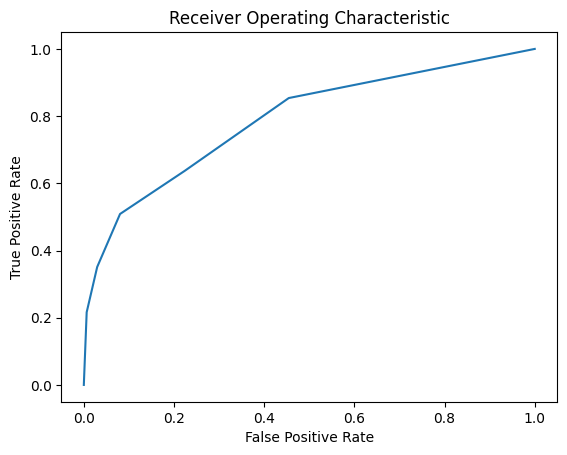

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn_accu_train, knn_accu_test, knn_auc  = evaluate_classifier(knn, X_train, X_test, y_train, y_test)

# Decision tree

Accuracy_train 1.0
Accuracy_test 0.7375776397515528


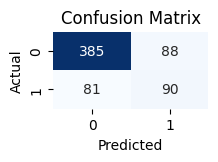


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       473
         1.0       0.51      0.53      0.52       171

    accuracy                           0.74       644
   macro avg       0.67      0.67      0.67       644
weighted avg       0.74      0.74      0.74       644

AUC Score:  0.6701346389228885


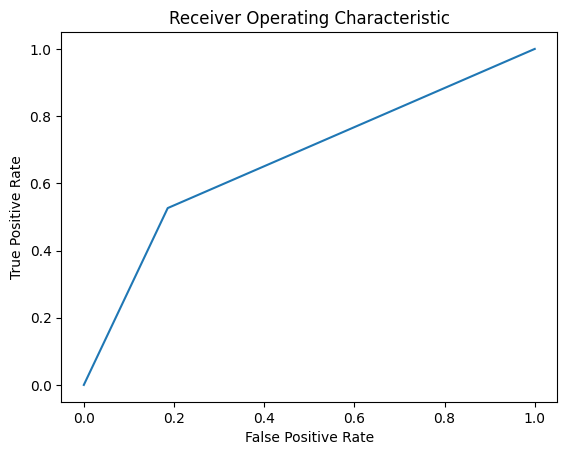

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc_accu_train, dtc_accu_test, dtc_auc = evaluate_classifier(dtc, X_train, X_test, y_train, y_test)

# Bagging Classifier

Accuracy_train 0.9654503105590062
Accuracy_test 0.8307453416149069


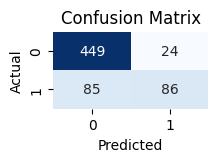


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       473
         1.0       0.78      0.50      0.61       171

    accuracy                           0.83       644
   macro avg       0.81      0.73      0.75       644
weighted avg       0.83      0.83      0.82       644

AUC Score:  0.8474895837196939


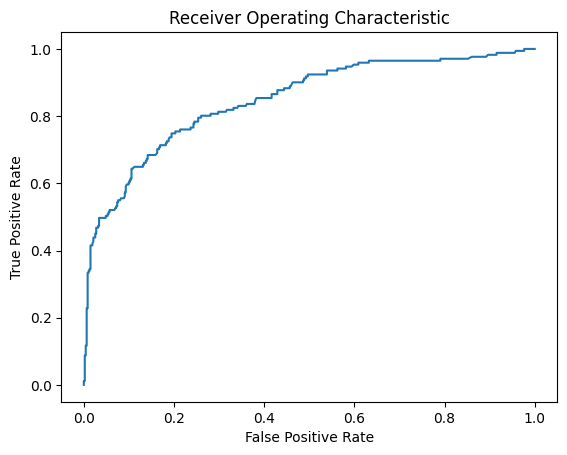

In [ ]:
from sklearn.ensemble import BaggingClassifier
# Replace 'base_estimator' with 'estimator'
Bagging = BaggingClassifier(estimator = RandomForestClassifier(), n_estimators = 10)

bagging_accu_train , bagging_accu_test, bagging_auc = evaluate_classifier(Bagging, X_train, X_test, y_train, y_test)

# Random Forest Classifier

Accuracy_train 1.0
Accuracy_test 0.8385093167701864


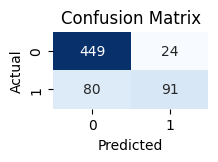


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       473
         1.0       0.79      0.53      0.64       171

    accuracy                           0.84       644
   macro avg       0.82      0.74      0.77       644
weighted avg       0.83      0.84      0.83       644

AUC Score:  0.8492513878070793


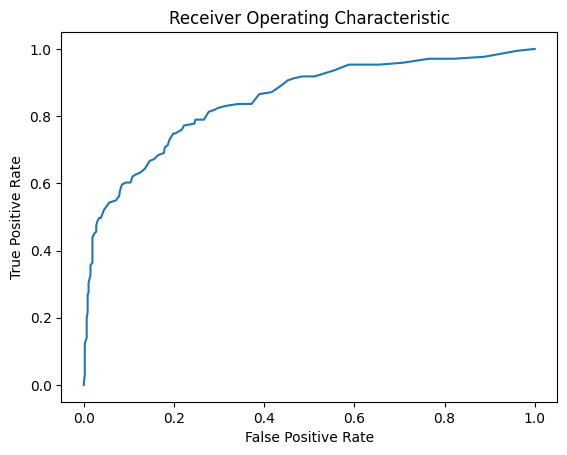

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_accu_train , rf_accu_test, rf_auc  = evaluate_classifier(rf, X_train, X_test, y_train, y_test)

# Ada Boost Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy_train 1.0
Accuracy_test 0.8369565217391305


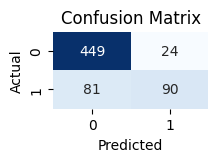


Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90       473
         1.0       0.79      0.53      0.63       171

    accuracy                           0.84       644
   macro avg       0.82      0.74      0.76       644
weighted avg       0.83      0.84      0.83       644

AUC Score:  0.8462408664367048


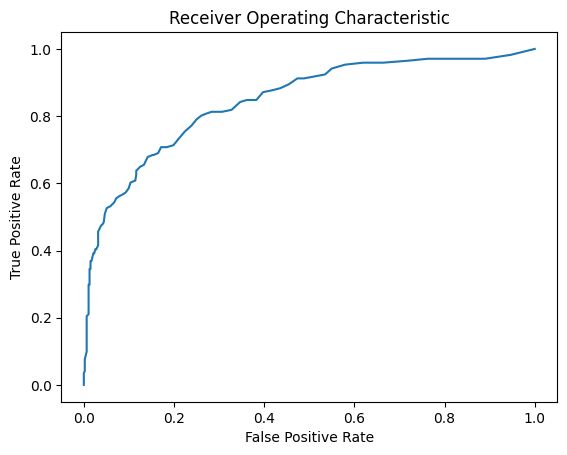

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Replace 'base_estimator' with 'estimator'
boosting = AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=10)

boosting_accu_train, boosting_accu_test, boosting_auc = evaluate_classifier(boosting, X_train, X_test, y_train, y_test)

# Final Score Summary of Different Models

In [ ]:
data = [
        {'Model' : 'Logistic Regression', 'Accuracy_train' : logreg_accu_train , 'Accuracy_test' : logreg_accu_test, 'AUC_score': logreg_auc },
        {'Model' : 'Linear Discriminant Model', 'Accuracy_train' : lda_accu_train , 'Accuracy_test' : lda_accu_test, 'AUC_score': lda_auc },
        {'Model' : 'Random Forest CLassifier', 'Accuracy_train' : rf_accu_train , 'Accuracy_test' : rf_accu_test, 'AUC_score': rf_auc },
        {'Model' : 'Decision Tree Classifier', 'Accuracy_train' : dtc_accu_train , 'Accuracy_test' : dtc_accu_test, 'AUC_score': dtc_auc },
        {'Model' : 'Support Vector Classifier', 'Accuracy_train' : svc_accu_train , 'Accuracy_test' : svc_accu_test, 'AUC_score': svc_auc },
        {'Model' : 'Bagging Classifier', 'Accuracy_train' : bagging_accu_train , 'Accuracy_test' : bagging_accu_test, 'AUC_score': bagging_auc },
        {'Model' : 'KNN Classifier', 'Accuracy_train' : knn_accu_train , 'Accuracy_test' : knn_accu_test, 'AUC_score': knn_auc },
        {'Model' : 'AdaBoost Classifier', 'Accuracy_train' : boosting_accu_train , 'Accuracy_test' : boosting_accu_test, 'AUC_score':boosting_auc }
]

df  = pd.DataFrame(data, columns = ['Model' , 'Accuracy_train' , 'Accuracy_test' , 'AUC_score'])
print(df)

                       Model  Accuracy_train  Accuracy_test  AUC_score
0        Logistic Regression        0.837345       0.832298   0.843206
1  Linear Discriminant Model        0.836180       0.829193   0.842538
2   Random Forest CLassifier        1.000000       0.838509   0.849251
3   Decision Tree Classifier        1.000000       0.737578   0.670135
4  Support Vector Classifier        0.854037       0.824534   0.825427
5         Bagging Classifier        0.965450       0.830745   0.847490
6             KNN Classifier        0.864907       0.810559   0.788886
7        AdaBoost Classifier        1.000000       0.836957   0.846241


Among these above models Bagging Classifier is a reliable option for accurate rainfall prediction due to its high accuracy and strong AUC score on test data. The models potential overfitting on the training data is not a significant concern as long as the model delivers reliable results on unseen data.

## Cross Validation Score for Bagging Classifier

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
cv_scores = cross_val_score(Bagging, X_test, y_test, cv=5)

print("Cross-Validation Scores:")
print(cv_scores)
print("Mean Accuracy: ", cv_scores.mean())

Cross-Validation Scores:
[0.80620155 0.7751938  0.82170543 0.85271318 0.8828125 ]
Mean Accuracy:  0.8277252906976745


##Hyper Tuning in Bagging Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier

# Define the parameter grid for grid search
# Changed 'base_estimator' to 'estimator'
param_grid = {
    'estimator': [LinearDiscriminantAnalysis()],
    'n_estimators': [10, 15, 50],
    'max_samples': [0.5, 0.8, 1.0],
    'max_features': [0.5, 0.8, 1.0],
}

# Create a Bagging classifier
bagging = BaggingClassifier()

# Perform grid search to find the best parameters
grid_search = GridSearchCV(bagging, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'estimator': LinearDiscriminantAnalysis(), 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 10}


##Bagging Classifier Model with best parameters according to Hypertuning

Accuracy_train 0.8369565217391305
Accuracy_test 0.8322981366459627


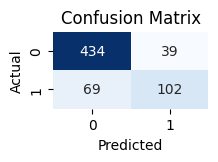


Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89       473
         1.0       0.72      0.60      0.65       171

    accuracy                           0.83       644
   macro avg       0.79      0.76      0.77       644
weighted avg       0.83      0.83      0.83       644

AUC Score:  0.8420310819331628


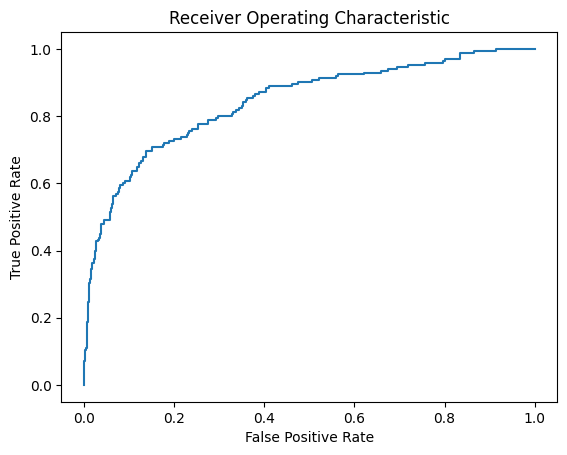

In [ ]:
# In ipython-input-102-2692649568f0
bagging3 = BaggingClassifier(estimator=LinearDiscriminantAnalysis(), n_estimators=10, max_features=1.0, max_samples=1.0)
bagging3_accu_train, bagging3_accu_test, bagging3_auc = evaluate_classifier(bagging3, X_train, X_test, y_train, y_test)

As in our Bagging model before hypertuning there is more accuracy on testing and also have more AUC score than after hypertuning so it is preferrable to use the model before hypertuning

#Predicting y_test values And Compare with the actual y_test values

In [ ]:
X_test.shape


(644, 14)

In [ ]:
y_pred = lda.predict(X_test)

In [ ]:
len(y_pred)

644

In [ ]:
y_test_copy = y_test.copy()
y_test_copy.reset_index(drop = True, inplace = True)
y_test_copy.shape

(644,)

In [ ]:
df_results = pd.DataFrame({'Actual RainTomorrow': y_test_copy,'Predicted RainTomorrow': y_pred})

In [ ]:
# This below code will help to look at all rows and columns
pd.set_option('display.max_rows',None)

In [ ]:
df_results

,Actual RainTomorrow,Predicted RainTomorrow
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,1.0
4,0.0,0.0
5,1.0,0.0
6,0.0,0.0
7,0.0,1.0
8,1.0,0.0
9,0.0,0.0


# Questions & Answers

## 1. Your views about the problem statement?

1. My Views
* Context and Company Background: The Daily Buzz, a small newspaper company in Sydney, highlights its unique approach in market competition, community engagement,innovation and adaption,technological integration.

* Data Description: The Dataset conatins information about Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,	Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow. This information will be used to train and test the predictive model.

* Classification Task: The primary objective is to perform a classification task, where the aim is to predict rainfall, specifically the RainTommorow is Yes or No.

* Role of Statistics: The role of statistics is to build and check the accuracy of the model.

* Data Preprocessing: Data Preprocessing is most important task as it involves tasks like handling missing values,Delete unnessary columns, data cleaning, detection of outliers, categorical variables, normalization, and feature selection.

## 2. What will be your approach to solving this task?

2. To solve this problem, I have outlined the following steps:

* Import the basic necessary libraries: numpy, pandas, matplotlib and seaborn.
* Load the required datasets using pandas.
* Check for any null values in the dataset and remove rows with less than 5% missing values. Fill the remaining missing values with the mean of their corresponding column.
* Obtain information about the dataset, including the number of categorical and numerical features.
* Convert all categorical features into numerical format.
* Check for duplicate rows in the dataset (No duplicate rows were found).
* Look for multicollinearity between columns and remove one of the highly correlated columns.
* Look for outliers by creating scatter distribution plots and box plots.
* Handle outliers using the interquartile range (IQR) method.
* Split the data into training and testing sets using an 80:20 ratio.
* Perform feature scaling on the X_train and y_train data.
* Create a custom function that provides a summary report for different models based on the input.
* Check different models by importing the corresponding model libraries and calling the function with the required parameters.
* Generate a table containing the accuracy of the train data (for checking overfitting), accuracy of the test data, and AUC score.
* Based on the table, determine that Bagging has the highest accuracy and AUC score.
* Perform cross-validation on the Bagging model.
* Optimize the Bagging model by adjusting its parameters using hyperparameter tuning.
* After hyperparameter tuning, observe decrement in the results. Therefore, preferred the Bagging Classifier model before hyperparameter tuning due to computational efficiency.
* Generate a table that show the actual RainTomorrow and predicted RainTomorrow.

## 3. What were the available ML model options you had to perform this task?

3. The available ML model options had to perform on this task

**1. Logistic Regression:**
- A linear model used for binary classification, which estimates the probability that a given input belongs to a certain category.

**2. Support Vector Classifier (SVC)**

**3. Linear Discriminant Analysis(LDA):**
- A method used for dimensionality reduction and classification, which finds the linear combinations of features that best separate different classes.

**4. K Nearest Neighbours(KNN):**
- A simple algorithm that classifies objects based on the majority class among their K nearest neighbors in the feature space.

**5. Decision Tree:**
- A tree-like model where each internal node represents a decision based on a feature, leading to splits that ultimately classify the data into classes at the leaf nodes

**6. Random Forest:**
- An ensemble method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting

**7. ADA Boost:**
- Another ensemble method that combines multiple weak learners (e.g., decision trees) sequentially, giving more weight to incorrectly classified instances in each iteration.

**8. Bagging Classifier:**
- A general ensemble method that builds multiple models independently and combines their predictions through averaging or voting, with each model trained on a random subset of the data.


##4. Which model’s performance is best and what could be the possible reason for that?

4. The Bagging classifier was chosen as the best model for predicting rainfall. Among these above models Bagging Classifier is a reliable option for accurate rainfall prediction due to its high accuracy of 0.840062 and strong AUC score of 0.851687 which is highest among other models on test data. Here are some key reasons for its superior performance:


1.   Bagging combines multiple models to capture complex relationships in the data, leading to accurate rainfall predictions.

2.   It reduces overfitting by training each model on different subsets of the data, enhancing the model's ability to work with new, unseen data.

3.   Bagging is computationally efficient and works well with large datasets.

4.   It can handle both simple and complex relationships between features and rainfall prediction.

5.   Bagging provides insights into important features for predicting rainfall.

These reasons highlight why the Bagging classifier stood out as the top choice for predicting rainfall accurately.





## 5. What steps can you take to improve this selected model’s performance even further?

5. To further improve the performance of the selected Bagging classifier model, we can focus on the following key points:

**1. Feature Selection :** Evaluate the importance of each feature and select the most relevant ones for rainfall prediction. Removing irrelevant or highly correlated features can enhance the model's performance.

**2. Hyperparameter Tuning :** Experiment with different hyperparameter settings for the Bagging classifier. Adjust parameters like the number of base estimators, maximum samples, or maximum features to find the optimal configuration for your specific dataset.   

**3. Cross-Validation :** Implement cross-validation techniques to assess the model's performance more accurately. Use techniques like k-fold cross-validation to obtain a better estimate of the model's ability to generalize to unseen data.

**4. Data Cleaning and Preprocessing :** Ensure the dataset is clean and handle outliers or missing values appropriately. Clean and preprocess the data by applying techniques like normalization, scaling, or imputation to improve the model's predictions.       

**5. Ensemble Methods :** Consider using ensemble techniques like bagging or boosting with different base estimators. By combining multiple Bagging classifier models or other classifiers, you can potentially improve the prediction accuracy and overall robustness of the model.

By addressing these points, we can refine our Bagging classifier model and potentially achieve better performance in predicting rainfall.